<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/hccho2/DL-UPMTP/blob/master/DL-TF-TORCH-CH2-3-Regression-DL.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

In [ ]:
# Matplotlib 한글 사용
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 실행 후 런타임 다시 시작해야 함. (런타임 - 런타임 다시 시작)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font',family=['NanumGothic','sans-serif']) # plt.rcParams['font.family'] = ['NanumGothic','sans-serif']
plt.rc('axes', unicode_minus=False)  # plt.rcParams['axes.unicode_minus'] = False

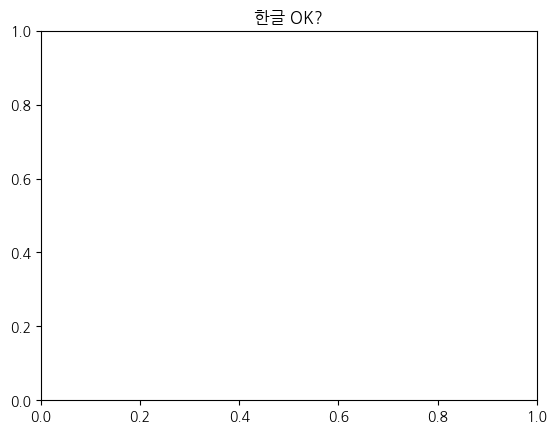

In [ ]:
plt.title('한글 OK?')
plt.show()

# 2.1 머신러닝과 회귀분석

## 2.1.1 선형회귀 분석

In [ ]:
import numpy as np
np.random.seed(100)

2.0395017047520887 0.4453361968069182


Text(0.6, 0.5, '(x평균,y평균)')

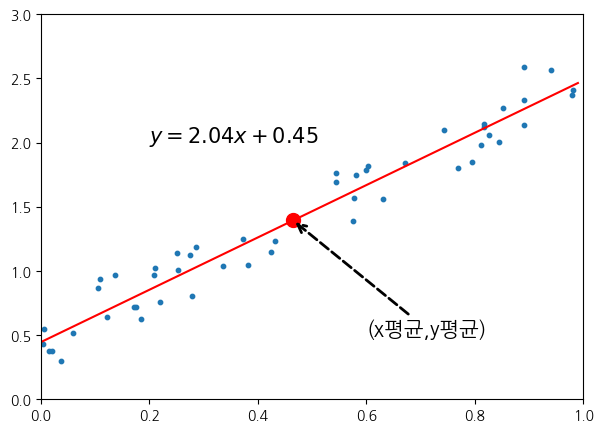

In [ ]:
N = 50
x = np.random.rand(N)

y = 2*x + 0.5 + np.random.randn(N)*0.15

X = np.stack([x,np.ones(N)]).T
a,b = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))
print(a,b)

plt.figure(figsize=(7,5))
plt.scatter(x,y,s=10)
x_temp = np.arange(0,1,0.01)
yy = a*x_temp + b
plt.plot(x_temp,yy,c='r')

plt.ylim(0,3)
plt.xlim(0,1)
plt.text(0.2,2,f"$y={a:.2f}x + {b:.2f}$", fontsize=15)

plt.plot([x.mean()],[y.mean()],'ro',markersize=10)

plt.annotate("(x평균,y평균)", xy=(x.mean(), y.mean()), xytext=(0.6, 0.5), arrowprops=dict(arrowstyle="->",linestyle="--", linewidth=2,color='k'),fontsize=15)

(0.0, 1.0)

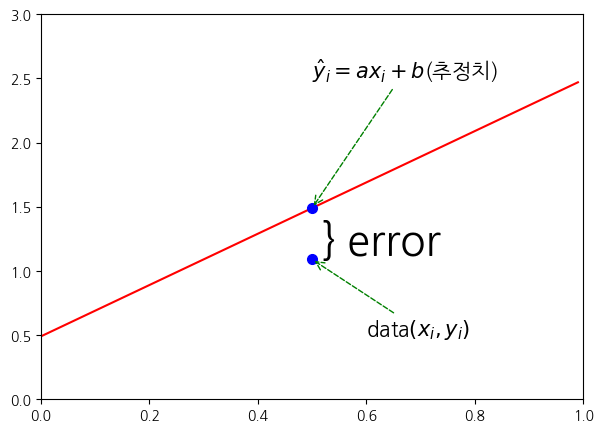

In [ ]:
a = 2.00; b = 0.49;
x_temp = np.arange(0,1,0.01)
yy = a*x_temp + b

plt.figure(figsize=(7,5))
plt.plot(x_temp,yy,c='r')
plt.plot([0.5],[a*0.5+b],'bo',markersize=7)
plt.plot([0.5],[a*0.5+b-0.4],'bo',markersize=7)

plt.annotate("data$(x_i,y_i)$", xy=(0.5, a*0.5+b-0.4), xytext=(0.6, 0.5), arrowprops=dict(arrowstyle="->",linestyle="--", linewidth=1,color='g'),fontsize=15)
plt.annotate("$\hat{y}_i= a x_i + b$(추정치)", xy=(0.5, a*0.5+b), xytext=(0.5, 2.5), arrowprops=dict(arrowstyle="->",linestyle="--", linewidth=1,color='g'),fontsize=15)

plt.text(0.52,a*0.5+b-0.35,"} error",fontsize=30)
#plt.text(0.52,a*0.5+b-0.35,"}",fontsize=30)
plt.ylim(0,3)
plt.xlim(0,1)

# 2.2 회귀분석 모델의 행렬 표현

## 2.2.4 Normal Equation

In [ ]:
import numpy as np

In [ ]:
np.random.seed(100)
N = 50
a = 2.0; b = 0.5

X = np.random.rand(N) # shape(N,)
Y = a*X + b + np.random.randn(N)*0.05
X = np.stack([X,np.ones(N)],axis=1)
a_pred, b_pred = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(Y))
print(f'true values: {a}, {b}  --> 예측값: {a_pred:.3f}, {b_pred:.3f}')

true values: 2.0, 0.5  --> 예측값: 2.013, 0.482


In [ ]:
X.shape

(50, 2)

# 2.4 선형회귀 모델 구현

## 2.4.1 Numpy로 구현



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(100)
learning_rate = 0.01
M = 2000
N = 50
x = np.random.rand(N)

Y = 2*x + 0.5 + np.random.randn(N)*0.15
X = np.stack([x,np.ones(N)],axis=1)

W = np.random.randn(2)
Loss_all = []
for i in range(M):
    Y_hat = X.dot(W)
    Loss = np.square(Y_hat-Y).sum()/N
    Loss_all.append(Loss)
    dY = 2*(Y_hat - Y)/N
    dW = X.T.dot(dY)
    W = W - learning_rate*dW
    if i%200==0:
        print(f'{i}/{M}: loss = {Loss}')

0/2000: loss = 2.111844433208157
200/2000: loss = 0.12078556040542082
400/2000: loss = 0.07458731520252487
600/2000: loss = 0.05000132795525137
800/2000: loss = 0.036892538441009946
1000/2000: loss = 0.029903175427620273
1200/2000: loss = 0.026176576928153197
1400/2000: loss = 0.02418962384678861
1600/2000: loss = 0.023130217380514143
1800/2000: loss = 0.02256536153600002


Text(0.5, 0.98, 'Numpy로 계산한 결과')

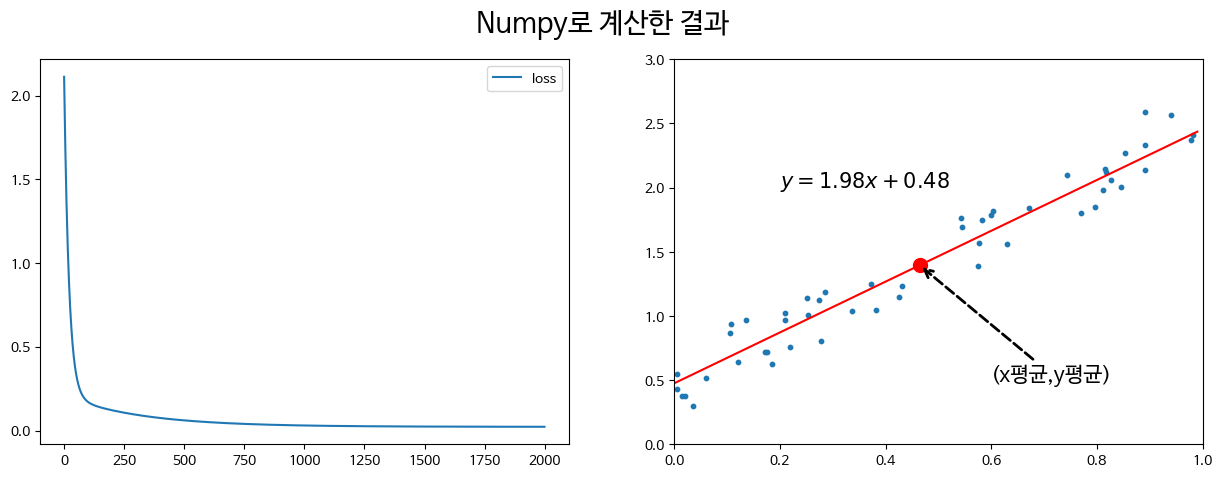

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(Loss_all,label='loss')
plt.legend()

plt.subplot(1,2,2)
plt.scatter(x,Y,s=10)
x_temp = np.arange(0,1,0.01)
a,b = W
yy = a*x_temp + b
plt.plot(x_temp,yy,c='r')

plt.ylim(0,3)
plt.xlim(0,1)
plt.text(0.2,2,f"$y={a:.2f}x + {b:.2f}$",fontsize=15)

plt.plot([x.mean()],[Y.mean()],'ro',markersize=10)

plt.annotate("(x평균,y평균)", xy=(x.mean(), Y.mean()), xytext=(0.6, 0.5), arrowprops=dict(arrowstyle="->",linestyle="--", linewidth=2,color='k'),fontsize=15)
plt.suptitle('Numpy로 계산한 결과',fontsize=20)

## 2.4.2 Numpy 모델로부터 추론

In [ ]:
new_data = np.array([0.52, 0.75])

a,b = W
prediction  = a*new_data + b
for x_,y_ in zip(new_data, prediction):
    print(f'{x_}에 대한 예측값 = {y_:.4f}')

0.52에 대한 예측값 = 1.5050
0.75에 대한 예측값 = 1.9605


In [ ]:
2*new_data + 0.5

array([1.54, 2.  ])

## 2.4.3 Tensorflow로 구현
- seed 고정1: np.random.seed(100); tf.random.set_seed(100); random.seed(100)
- seed 고정2:np.random.seed(100); tf.keras.utils.set_random_seed(100)

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
#np.random.seed(100); tf.random.set_seed(100); random.seed(100)
np.random.seed(100); tf.keras.utils.set_random_seed(100)
learning_rate = 0.01
n_epochs = 2000
N = 50

x = np.random.rand(N)
Y = 2*x + 0.5 + np.random.randn(N)*0.15
X = x.reshape(-1,1)

model = tf.keras.Sequential(tf.keras.layers.Dense(1,use_bias=True))
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
model.compile(optimizer,loss='mse')  #tf.keras.losses.MeanSquaredError()
#model.compile(optimizer,loss=tf.keras.losses.MeanSquaredError())

history = model.fit(X,Y,batch_size=N,epochs=n_epochs,verbose=0)

Text(0.5, 0.98, 'Tensorflow로 계산한 결과')

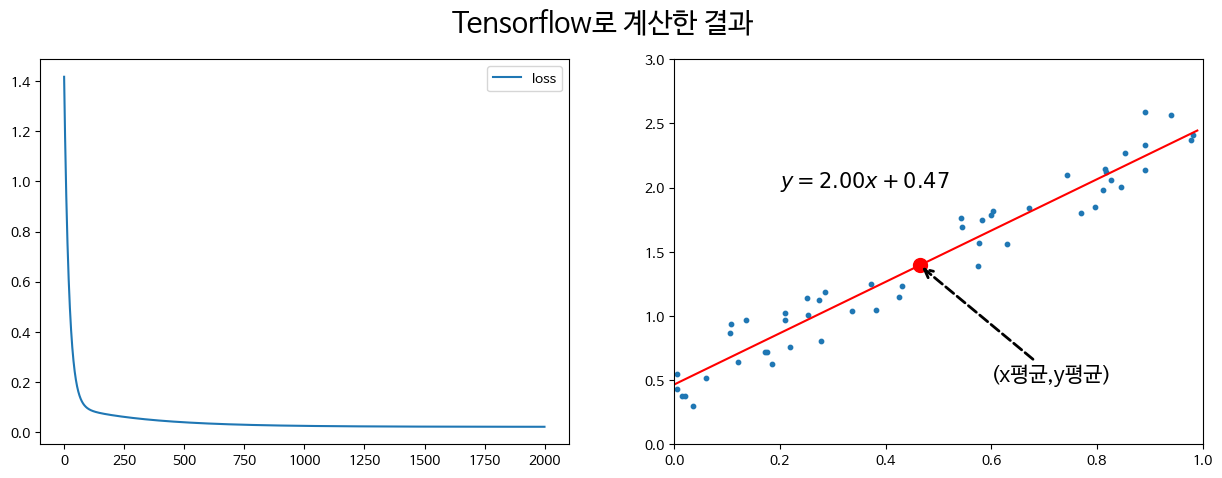

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='loss')
plt.legend()

plt.subplot(1,2,2)
plt.scatter(x,Y,s=10)
x_temp = np.arange(0,1,0.01)
a,b = model.weights[0][0,0].numpy(), model.weights[1][0].numpy()
yy = a*x_temp + b
plt.plot(x_temp,yy,c='r')

plt.ylim(0,3)
plt.xlim(0,1)
plt.text(0.2,2,f"$y={a:.2f}x + {b:.2f}$",fontsize=15)

plt.plot([x.mean()],[Y.mean()],'ro',markersize=10)

plt.annotate("(x평균,y평균)", xy=(x.mean(), Y.mean()), xytext=(0.6, 0.5), arrowprops=dict(arrowstyle="->",linestyle="--", linewidth=2,color='k'),fontsize=15)
plt.suptitle('Tensorflow로 계산한 결과',fontsize=20)

In [ ]:
# weights[0]: weight matrix
# wedighs[1]: bias
print(model.weights[0][0,0].numpy(), model.weights[1][0].numpy())

1.999064 0.46574068


In [ ]:
print(model.weights)
print(f'기울기: {model.weights[0][0,0].numpy():.2f}, bias: {model.weights[1][0].numpy():.2f}')

[<tf.Variable 'dense_3/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.999064]], dtype=float32)>, <tf.Variable 'dense_3/bias:0' shape=(1,) dtype=float32, numpy=array([0.46574068], dtype=float32)>]
기울기: 2.00, bias: 0.47


## 2.4.4 Tensorflow 모델로부터 추론

In [ ]:
new_data = np.array([0.52, 0.75])

prediction  = model.predict(new_data).reshape(-1)  #(N,1) -> (N,)
for x,y in zip(new_data, prediction):
    print(f'{x}에 대한 예측값 = {y:.4f}')

1/1 [==============================] - 0s 93ms/step
0.52에 대한 예측값 = 1.5053
0.75에 대한 예측값 = 1.9650


In [ ]:
# 행렬곱으로 직접 계산하기

new_data = np.array([0.52, 0.75])
tf.matmul(new_data[:,None].astype(np.float32),model.weights[0]) + model.weights[1]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[1.5052539],
       [1.9650387]], dtype=float32)>

In [ ]:
new_data[:,None].shape

(2, 1)

## 2.4.5 Pytorch로 구현
- numpy array의 실수형 기본형은 float64
- pytorch layer는 기본형이 float32
- model.double()로 float64로 변경 가능
- numpy array를 torch.Tensor(x)로 float32로 생성하는 것이 좋다.
- torch.from_numpy --> 메모리 공유, dtype 설정 불가
- torch.tensor(x,dtype=torch.foat32)  --> dtype 설정 가능

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def torch_reset_seed(seed=100):
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)


np.random.seed(100);
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

torch_reset_seed(100)

learning_rate = 0.01
n_epochs = 2000
N = 50

x = np.random.rand(N)  # np.float64
y = 2*x + 0.5 + np.random.randn(N)*0.15

X = torch.Tensor(x).reshape(-1,1).to(device)  # torch.tensor(x,dtype=torch.float32).reshape(-1,1).to(device)
Y = torch.Tensor(y).to(device)

model = torch.nn.Linear(1,1)

model.to(device)
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
Loss_all = []
model.train()  # train mode 변환
for i in range(n_epochs):
    optimizer.zero_grad()
    Y_hat = model(X)
    Loss = loss_fn(Y_hat.reshape(-1),Y)
    Loss_all.append(Loss.item())
    Loss.backward()
    optimizer.step()
    if i%200==0:
        print(f'{i}/{n_epochs}: loss = {Loss.item()}')

cpu
0/2000: loss = 2.0522611141204834
200/2000: loss = 0.30470961332321167
400/2000: loss = 0.1726619154214859
600/2000: loss = 0.10229284316301346
800/2000: loss = 0.06477334350347519
1000/2000: loss = 0.04476871341466904
1200/2000: loss = 0.03410260006785393
1400/2000: loss = 0.028415609151124954
1600/2000: loss = 0.025383437052369118
1800/2000: loss = 0.02376674860715866


Text(0.5, 0.98, 'Pytorch로 계산한 결과')

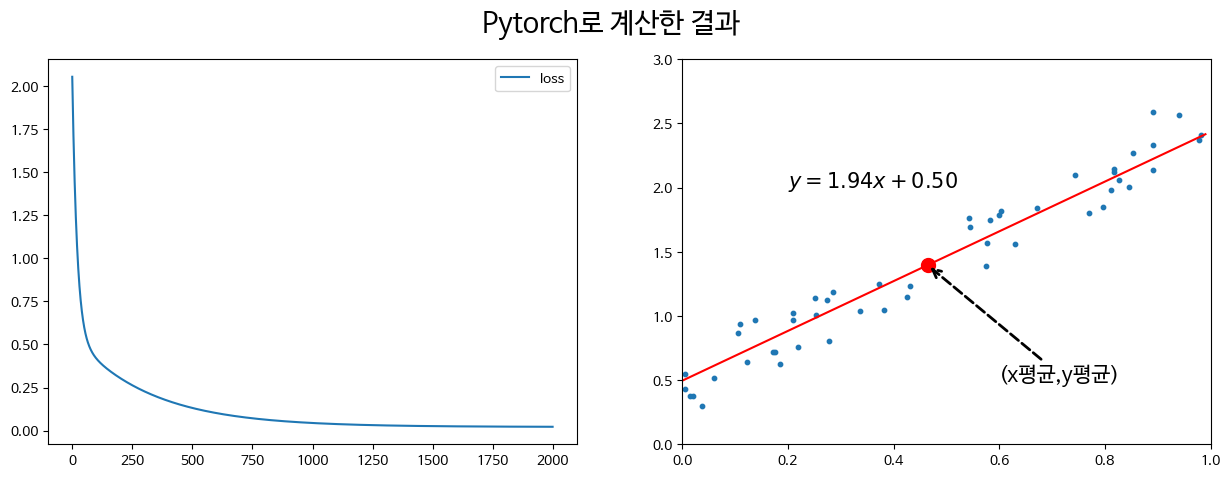

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(Loss_all,label='loss')
plt.legend()

plt.subplot(1,2,2)
plt.scatter(x,y,s=10)
x_temp = np.arange(0,1,0.01)
a,b = model.weight.item(), model.bias.item()
yy = a*x_temp + b
plt.plot(x_temp,yy,c='r')

plt.ylim(0,3)
plt.xlim(0,1)
plt.text(0.2,2,f"$y={a:.2f}x + {b:.2f}$",fontsize=15)

plt.plot([x.mean()],[y.mean()],'ro',markersize=10)

plt.annotate("(x평균,y평균)", xy=(x.mean(), y.mean()), xytext=(0.6, 0.5), arrowprops=dict(arrowstyle="->",linestyle="--", linewidth=2,color='k'),fontsize=15)
plt.suptitle('Pytorch로 계산한 결과',fontsize=20)

In [ ]:
model.weight.item(), model.bias.item()

(1.9395499229431152, 0.49577075242996216)

In [ ]:
for a in model.parameters():
    print(a)

Parameter containing:
tensor([[1.9395]], requires_grad=True)
Parameter containing:
tensor([0.4958], requires_grad=True)


## 2.4.6 Pytorch 모델로부터 추론

In [ ]:
new_data = torch.tensor([0.52, 0.75]).reshape(-1,1).to(device)
with torch.no_grad():
    model.eval()
    prediction  = model(new_data).cpu().numpy().reshape(-1)
for x,y in zip(new_data.cpu().numpy().reshape(-1), prediction):
    print(f'{x:.2f}에 대한 예측값 = {y:.4f}')

0.52에 대한 예측값 = 1.5043
0.75에 대한 예측값 = 1.9504


## 2.4.7 Scikit-Learn 구현

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(100);
N = 50
x = np.random.rand(N)
Y = 2*x + 0.5 + np.random.randn(N)*0.15
X = x.reshape(-1,1) # (N,) -> (N,1)

reg = LinearRegression().fit(X, Y)
print(f'결정 계수: {reg.score(X, Y)}') # coefficient of determination(결정 계수)

print(f'기울기: {reg.coef_}, bias: {reg.intercept_}')

new_data = np.array([0.52, 0.75]).reshape(-1,1)
print(f'예측: {reg.predict(new_data)}')

결정 계수: 0.9484605364424324
기울기: [2.0395017], bias: 0.4453361968069173
예측: [1.50587708 1.97496248]


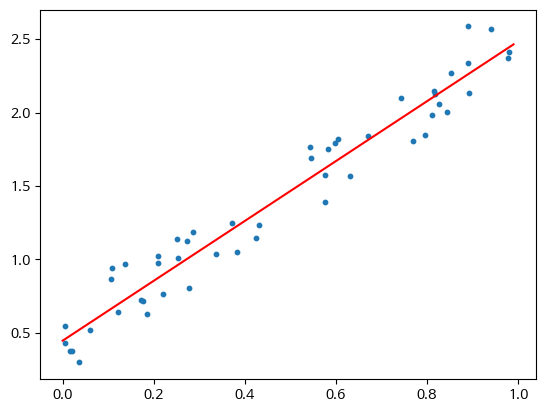

In [ ]:
plt.scatter(x,Y,s=10)
x_temp = np.arange(0,1,0.01)
a,b = reg.coef_, reg.intercept_
yy = a*x_temp + b
plt.plot(x_temp,yy,c='r')

## 2.4.9 Tensorflow, Pytorch로 Gradient 계산하기
- tensorflow, pytorch, numpy 계산 결과가 모두 동일하다.

In [ ]:
import numpy as np
import torch
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
X0 = np.random.randn(2,3)
W0 = np.random.randn(3,2)
dY0 = np.random.randn(2,2)
X = torch.tensor(X0,requires_grad=True)
W = torch.tensor(W0,requires_grad=True)
dY = torch.tensor(dY0)  # upstream gradient

In [ ]:
Y = torch.mm(X,W)
Y.backward(dY)

In [ ]:
print(f'Pytorch 결과: \n{X.grad} \n {W.grad}')

Pytorch 결과: 
tensor([[ 0.5902, -0.3464,  0.0042],
        [-2.7706, -3.1262,  0.1251]], dtype=torch.float64) 
 tensor([[ 2.0245,  1.0921],
        [ 2.9028,  1.8681],
        [-0.5222,  1.0202]], dtype=torch.float64)


In [ ]:
torch.mm(dY,W.T)   # X.grad와 일치

tensor([[ 0.5902, -0.3464,  0.0042],
        [-2.7706, -3.1262,  0.1251]], dtype=torch.float64,
       grad_fn=<MmBackward0>)

In [ ]:
torch.mm(X.T,dY)  # W.grad와 일치

tensor([[ 2.0245,  1.0921],
        [ 2.9028,  1.8681],
        [-0.5222,  1.0202]], dtype=torch.float64, grad_fn=<MmBackward0>)

In [ ]:
X = tf.convert_to_tensor(X0)
W = tf.convert_to_tensor(W0)
dY = tf.convert_to_tensor(dY0)

In [ ]:
with tf.GradientTape() as tape:
    tape.watch([X,W])
    Y = tf.matmul(X,W)

dX,dW = tape.gradient(Y, [X,W],output_gradients=dY)   # output_gradients = upstream gradient
print(dX,dW)

tf.Tensor(
[[ 0.59022318 -0.34643884  0.00422228]
 [-2.77064257 -3.12624064  0.12509663]], shape=(2, 3), dtype=float64) tf.Tensor(
[[ 2.02450308  1.09210849]
 [ 2.90282027  1.86806106]
 [-0.52220484  1.02016093]], shape=(3, 2), dtype=float64)


Tensorflow GradientTape

In [ ]:
XX = tf.Variable(X0)
WW = tf.Variable(W0)

with tf.GradientTape() as tape:
    YY = tf.matmul(XX,WW)

dXX,dWW = tape.gradient(YY, [XX,WW],output_gradients=dY)   # output_gradients = upstream gradient
print(dXX,dWW)


tf.Tensor(
[[ 0.59022318 -0.34643884  0.00422228]
 [-2.77064257 -3.12624064  0.12509663]], shape=(2, 3), dtype=float64) tf.Tensor(
[[ 2.02450308  1.09210849]
 [ 2.90282027  1.86806106]
 [-0.52220484  1.02016093]], shape=(3, 2), dtype=float64)


In [ ]:
with tf.GradientTape(persistent=True) as tape:
    YY = tf.matmul(XX,WW)

dXX= tape.gradient(YY, XX,output_gradients=dY)
dWW= tape.gradient(YY, WW,output_gradients=dY)
del tape
print(dXX,dWW)


tf.Tensor(
[[ 0.59022318 -0.34643884  0.00422228]
 [-2.77064257 -3.12624064  0.12509663]], shape=(2, 3), dtype=float64) tf.Tensor(
[[ 2.02450308  1.09210849]
 [ 2.90282027  1.86806106]
 [-0.52220484  1.02016093]], shape=(3, 2), dtype=float64)


# 3.1 문제 해결과 가상 데이터

## 3.1.2 비선형 경계 data 분류(Logistic 회귀)

In [ ]:
from sklearn.datasets import make_circles, make_moons
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import torch
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
def generate_data(N, data_type='moon'):
    if data_type == 'moon':
        return make_moons(n_samples = N, random_state=0, noise=0.2)  # numpy array
    elif data_type == 'circle':
        return make_circles(n_samples = N,factor=0.7, random_state=0, noise=0.1) #factor가 높으면 혼잡도 증가
    else:
        print("data typed은 'moon' 또는 'circle' 이어야 합니다.")
        return None,None

In [ ]:
N=1000
X_c, Y_c = generate_data(N, 'circle')  # (1000, 2), (1000,)
X_m, Y_m = generate_data(N, 'moon')    # (1000, 2), (1000,)

data_c = np.concatenate([X_c,Y_c.reshape(-1,1)],axis=-1)
data_m = np.concatenate([X_m,Y_m.reshape(-1,1)],axis=-1)

In [ ]:
X_c.shape, Y_c.shape, X_m.shape, Y_m.shape, data_c.shape, data_m.shape

((1000, 2), (1000,), (1000, 2), (1000,), (1000, 3), (1000, 3))

Text(0.5, 0.98, 'sklearn dataset')

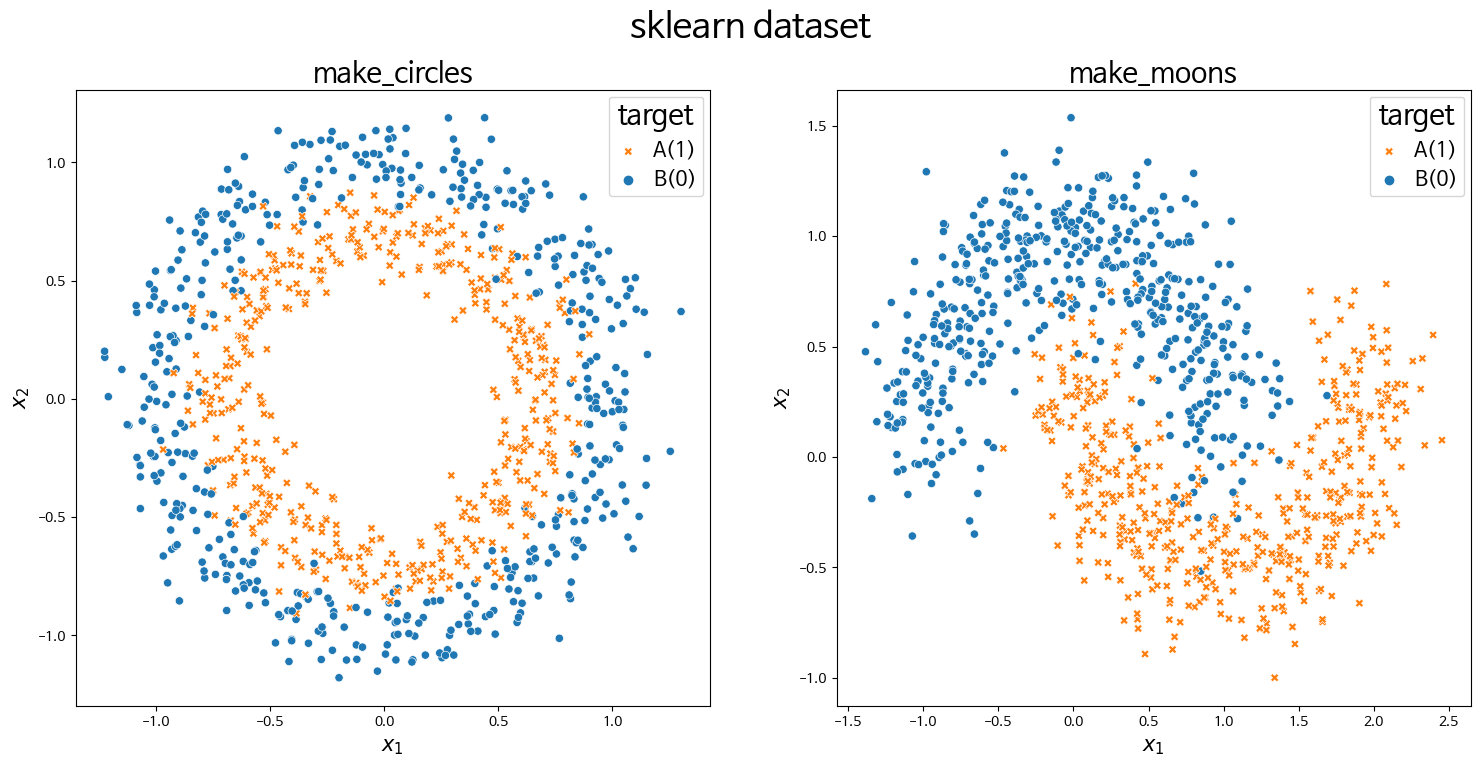

In [ ]:
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
df=pd.DataFrame(data=data_c,columns=['x','y','target'])
ax = sns.scatterplot(x='x',y='y',hue='target',style='target',data=df)

ax.legend(title='target', labels=['A(1)', 'B(0)'])
plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='20') # for legend title

plt.xlabel('$x_1$',fontsize=15);plt.ylabel('$x_2$',fontsize=15)
plt.title('make_circles',fontsize=20)

plt.subplot(1,2,2)
df=pd.DataFrame(data=data_m,columns=['x','y','target'])
ax = sns.scatterplot(x='x',y='y',hue='target',style='target',data=df)

ax.legend(title='target', labels=['A(1)', 'B(0)'])
plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='20') # for legend title

plt.xlabel('$x_1$',fontsize=15);plt.ylabel('$x_2$',fontsize=15)
plt.title('make_moons',fontsize=20)

plt.suptitle('sklearn dataset',fontsize=25)

# 3.2 Feature Engineering 기법

** 주의: 아래에 구현된 sigmoid 함수는 exp(-x) 계산 과정에서 overflow가 발생할 수 있다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
np.random.seed(100)

In [ ]:
a = [[2,3],[3,4]]
PolynomialFeatures(degree=2,include_bias=False).fit_transform(a)

array([[ 2.,  3.,  4.,  6.,  9.],
       [ 3.,  4.,  9., 12., 16.]])

Text(0.5, 1.0, 'Sigmoid')

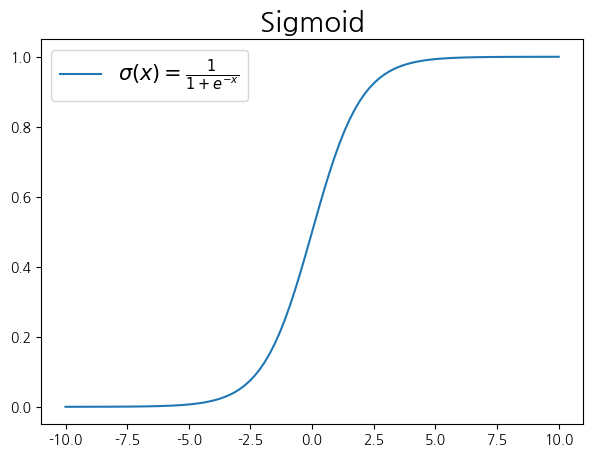

In [ ]:
def sigmoid(x):
    # 이렇게 단순히 구현하면 overflow가 발생할 수 있다.
    return 1/(1+np.exp(-x))

def bce(y_hat,y):
    '''
    y_hat: probability
    y: target
    '''
    epsilon = 1e-07
    loss = -y*np.log(y_hat+epsilon) - (1-y)*np.log(1-y_hat+epsilon)
    return loss.mean()


x = np.linspace(-10,10,100)
plt.figure(figsize=(7,5))
plt.plot(x,sigmoid(x),label=r'$\sigma(x) = \frac{1}{1+e^{-x}}$')
plt.legend(fontsize="15")
plt.title('Sigmoid',fontsize = 20)

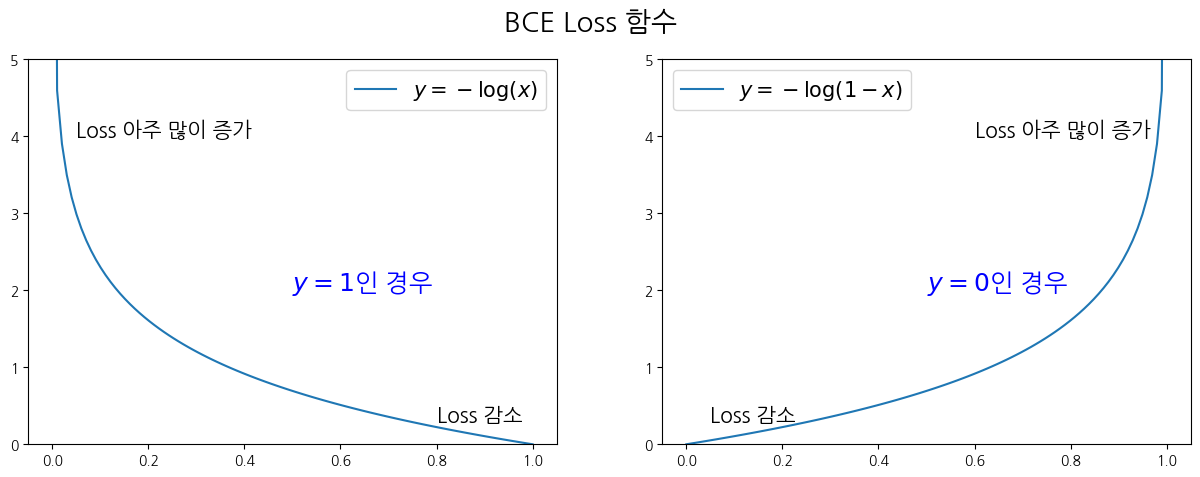

In [ ]:
epsilon=1e-8
x = np.linspace(epsilon,1-epsilon,100)
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(x,-np.log(x),label=r'$y=-\log(x)$')
plt.ylim(0,5)
plt.text(0.8,0.3,f"Loss 감소",fontsize=15)
plt.text(0.05,4,f"Loss 아주 많이 증가",fontsize=15)
plt.text(0.5,2,f"$y=1$인 경우",fontsize=18,color="Blue")

plt.legend(fontsize="15")

plt.subplot(1,2,2)
plt.plot(x,-np.log(1-x),label=r'$y=-\log(1-x)$')
plt.ylim(0,5)
plt.text(0.05,0.3,f"Loss 감소",fontsize=15)
plt.text(0.6,4,f"Loss 아주 많이 증가",fontsize=15)
plt.text(0.5,2,f"$y=0$인 경우",fontsize=18,color="Blue")
plt.legend(fontsize="15")
plt.suptitle('BCE Loss 함수',fontsize=20)
plt.show()

BCE Loss 계산

In [ ]:
import numpy as np
import tensorflow as tf
import torch
np.random.seed(100)

In [ ]:
# Numpy
batch_size = 5
y_pred = np.random.randn(batch_size) # logit

true_label_prob = True
if true_label_prob:
    y_true = np.random.rand(batch_size) #  0-1 사이의 확률
else:
    y_true = np.random.randint(2,size=batch_size) # 0 또는 1

print(sigmoid(y_pred), y_true)
bce(sigmoid(y_pred),y_true)

[0.14807678 0.58484148 0.76006498 0.437224   0.72737021] [0.13670659 0.57509333 0.89132195 0.20920212 0.18532822]


0.6453205480820212

In [ ]:
# Tensorflow
bce_loss1  = tf.keras.losses.BinaryCrossentropy(from_logits=True)
bce_loss2  = tf.keras.losses.BinaryCrossentropy(from_logits=False)

print(bce_loss1(y_true,y_pred))
print(bce_loss2(y_true,tf.sigmoid(y_pred)))
print(tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(y_true.astype(np.float64),y_pred)))

tf.Tensor(0.6453207619950817, shape=(), dtype=float64)
tf.Tensor(0.6453205480820214, shape=(), dtype=float64)
tf.Tensor(0.6453207619950817, shape=(), dtype=float64)


In [ ]:
# Pytorch
bce_loss3 = torch.nn.BCEWithLogitsLoss()
bce_loss4 = torch.nn.BCELoss()
yy_true = torch.Tensor(y_true)
yy_pred = torch.Tensor(y_pred)
print(bce_loss3(yy_pred,yy_true))
print(bce_loss4(torch.sigmoid(yy_pred),yy_true))
print(torch.nn.functional.binary_cross_entropy(torch.sigmoid(yy_pred),yy_true))

tensor(0.6453)
tensor(0.6453)
tensor(0.6453)


In [ ]:
# manual 계산
-np.mean(np.log(sigmoid(y_pred))*y_true + np.log(1-sigmoid(y_pred))*(1-y_true))

0.6453207619950815

## 3.2.3 Numpy로 구현

In [ ]:
import numpy as np

In [ ]:
def plot_prediction(X_origin,X_model,Y,model, title):
    '''
    X_origin: orgin data,
    X_model: model input
    '''
    #prediction = tf.where(model(X_model)>0.5,1,0).numpy().reshape(-1)
    prediction = np.where(model(X_model)>0.5,1,0).reshape(-1)

    df_pred=pd.DataFrame(data=np.c_[X_origin,Y, prediction],columns=['x','y','label','prediction'])
    df_pred['correct']=df_pred['label'] == df_pred['prediction'] # True/False

    plt.figure(figsize=(18,8))
    plt.subplot(1,2,1)
    ax = sns.scatterplot(x='x',
                    y='y',
                    hue='label', # different colors by group
                    s=50, # marker size
                    data=df_pred)
    ax.legend(title='Group', labels=['A', 'B'])
    plt.title('data',fontsize=20)

    plt.subplot(1,2,2)
    sns.scatterplot(x='x',
                    y='y',
                    hue='prediction', # different colors by group
                    style='correct', # different shapes by group
                    s=50, # marker size
                    markers = ['X', 'o'],
                    data=df_pred)
    plt.title('model prediction',fontsize=20)
    plt.suptitle(title,fontsize=20)

def plot_decision_boundary(X,Y,pred_func,polynomial_degree=0,include_bias=False,torch_model=False,logit_flag=False,device='cpu'):
    # 입력 데이터의 값 범위
    x_min, x_max = X[:, 0].min() - .2, X[:, 0].max() + .2
    y_min, y_max = X[:, 1].min() - .2, X[:, 1].max() + .2
    h = 0.02
    # Grid 생성
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # 생성된 Grid 값을 모델에 넣기 위해 Feature 추가
    if polynomial_degree:
        grid_data = PolynomialFeatures(degree=polynomial_degree,include_bias=include_bias).fit_transform(np.c_[xx.ravel(), yy.ravel()])
    else:
        grid_data = np.c_[xx.ravel(), yy.ravel()]
    if torch_model:
        grid_data = torch.Tensor(grid_data).to(device)
        Z = np.array(pred_func(grid_data).detach())
    else:
        Z = np.array(pred_func(grid_data))

    threshold = 0. if logit_flag else 0.5
    Z = np.where(Z > threshold,1,0)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 10))
    plt.contour(xx, yy, Z)

    df = pd.DataFrame(data=np.c_[X,Y],columns=['x','y','target'])
    ax = sns.scatterplot(x='x',y='y',hue='target',style='target',data=df)
    ax.legend(title='Group', labels=['A', 'B'])

In [ ]:
class ModelLogisticRegression:
    def __init__(self,input_dim):
        self.W = np.random.randn(input_dim)
    def __call__(self,X):
        return sigmoid(X.dot(self.W))
    def update_weight(self,dW,lr):
        self.W -= lr*dW

In [ ]:
np.random.seed(100)
learning_rate = 0.01
n_epochs = 50000

N= 1000
X, Y = generate_data(N, 'moon') # (N,2), (N,)  <--  generate_data(): 3.1.2에 구현되어 있다.

polynomial_degree = 10  # polynomial degree
XX = PolynomialFeatures(degree=polynomial_degree,include_bias=True).fit_transform(X)
input_dim = XX.shape[1]
model_np = ModelLogisticRegression(input_dim)

Loss_all = []
for i in range(n_epochs):
    Y_hat = model_np(XX)
    Loss = bce(Y_hat,Y)
    Loss_all.append(Loss)

    dZ = (Y_hat - Y)/N
    dW = XX.T.dot(dZ)
    model_np.update_weight(dW,learning_rate)

    if i%1000==0:
        print(f'{i}/{n_epochs}: loss = {Loss}')

Y_pred = np.where(Y_hat > 0.5,1,0)
acc = (Y_pred == Y).mean() # Train Accuracy
print(f'Train Accuracy: {acc}')

<ipython-input-10-96d2252b434b>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


0/50000: loss = 3.052118200881653
1000/50000: loss = 0.4011171312151624
2000/50000: loss = 0.27762188248137043
3000/50000: loss = 0.2283902951670787
4000/50000: loss = 0.20147373285879677
5000/50000: loss = 0.1842262418664846
6000/50000: loss = 0.17202933303930582
7000/50000: loss = 0.16283532915257115
8000/50000: loss = 0.1555995890776977
9000/50000: loss = 0.14972695992152182
10000/50000: loss = 0.14484845459283566
11000/50000: loss = 0.14072062116127346
12000/50000: loss = 0.13724812824234023
13000/50000: loss = 0.13429546282641594
14000/50000: loss = 0.1317353713067436
15000/50000: loss = 0.12948791282651279
16000/50000: loss = 0.12749438731685078
17000/50000: loss = 0.12571038376744018
18000/50000: loss = 0.12410166931260445
19000/50000: loss = 0.12264125545865329
20000/50000: loss = 0.12130752914936169
21000/50000: loss = 0.12008295659548646
22000/50000: loss = 0.1189531547234003
23000/50000: loss = 0.11790620988145903
24000/50000: loss = 0.11693216805348511
25000/50000: loss = 0

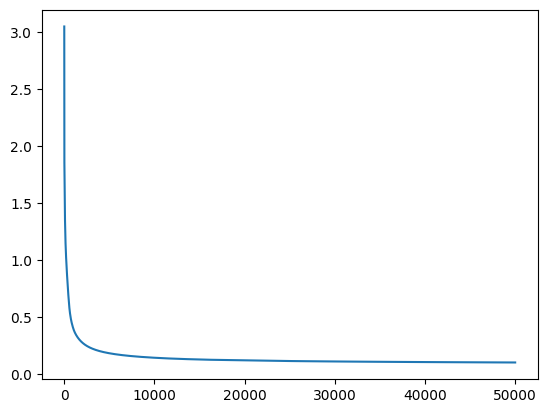

In [ ]:
plt.plot(Loss_all)

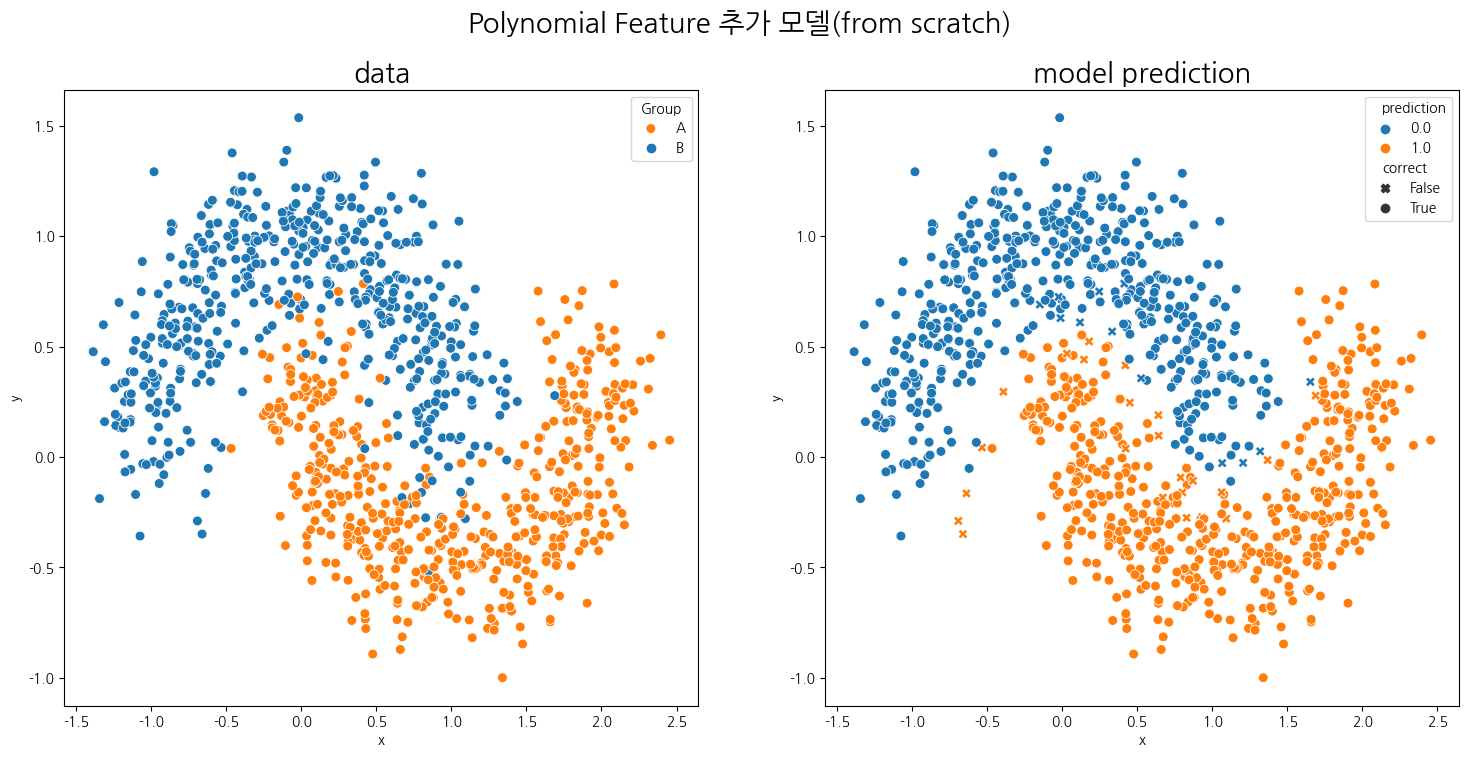

In [ ]:
plot_prediction(X,XX,Y,model_np, "Polynomial Feature 추가 모델(from scratch)")

<ipython-input-10-96d2252b434b>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


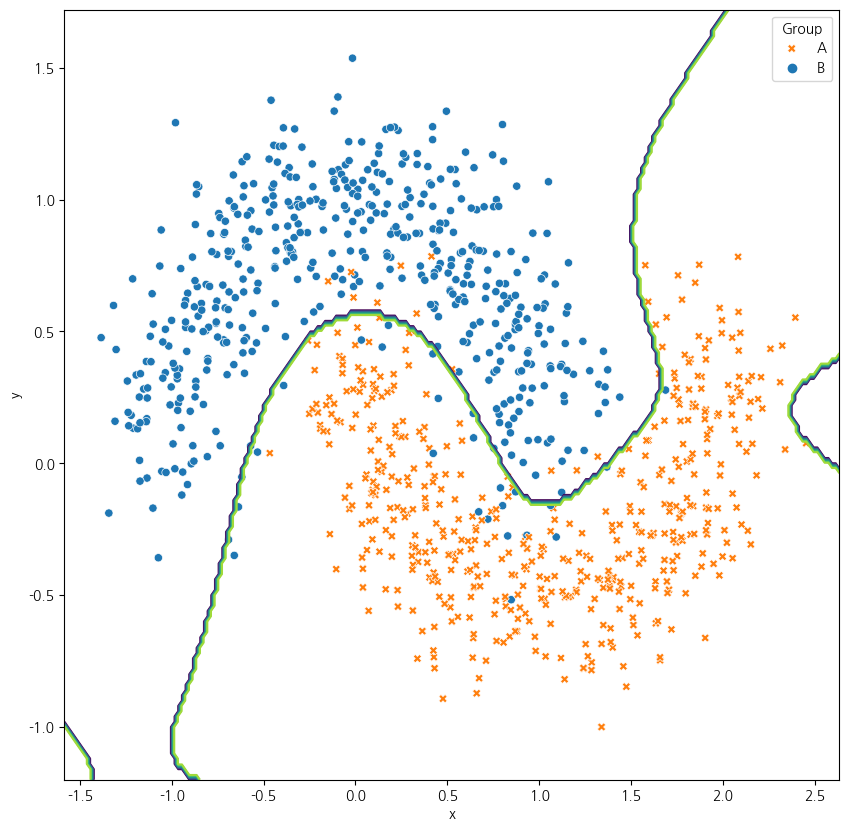

In [ ]:
plot_decision_boundary(X,Y,model_np,polynomial_degree,include_bias=True)

## 3.2.4 Tensorflow로 구현

In [ ]:
import tensorflow as tf

In [ ]:
# 5만 epoch: GPU(3분47초), CPU(2분50초)
np.random.seed(100); tf.random.set_seed(100)

N= 1000
X, Y = generate_data(N, 'moon')  # (1000, 2), (1000,)

learning_rate = 0.01
n_epochs = 50000
polynomial_degree = 10

XX = PolynomialFeatures(degree=polynomial_degree,include_bias=False).fit_transform(X)

model_tf = tf.keras.Sequential(tf.keras.layers.Dense(1,activation='sigmoid'))
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

model_tf.compile(optimizer,loss='bce',metrics=['accuracy'])

# loss_fn = tf.keras.losses.BinaryCrossentropy()
# model_tf.compile(optimizer,loss=loss_fn,metrics=['accuracy'])

history = model_tf.fit(XX,Y,batch_size=N,epochs=n_epochs,verbose=0)

print(f"loss: {history.history['loss'][-1]}, acc: {history.history['accuracy'][-1]}")

loss: 0.10395725816488266, acc: 0.9629999995231628


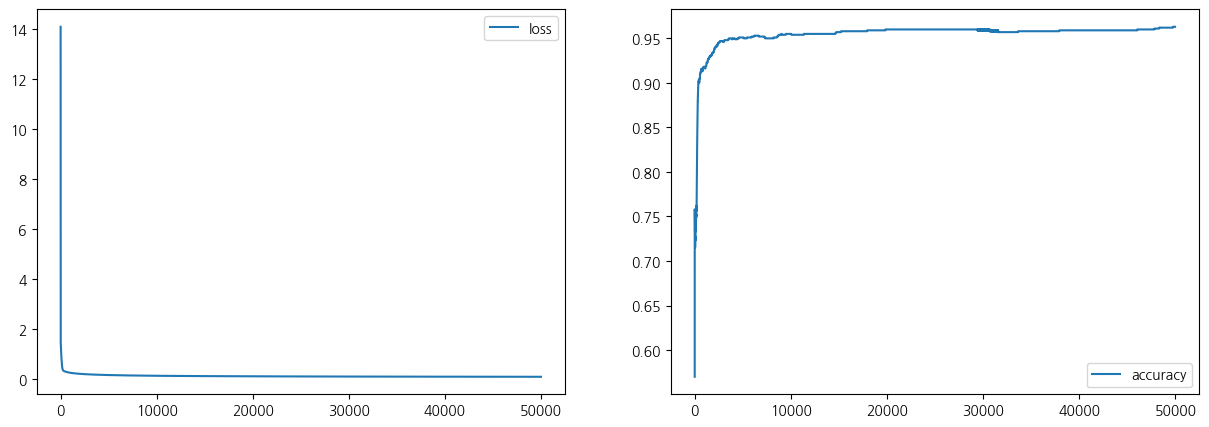

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label='accuracy')
plt.legend()

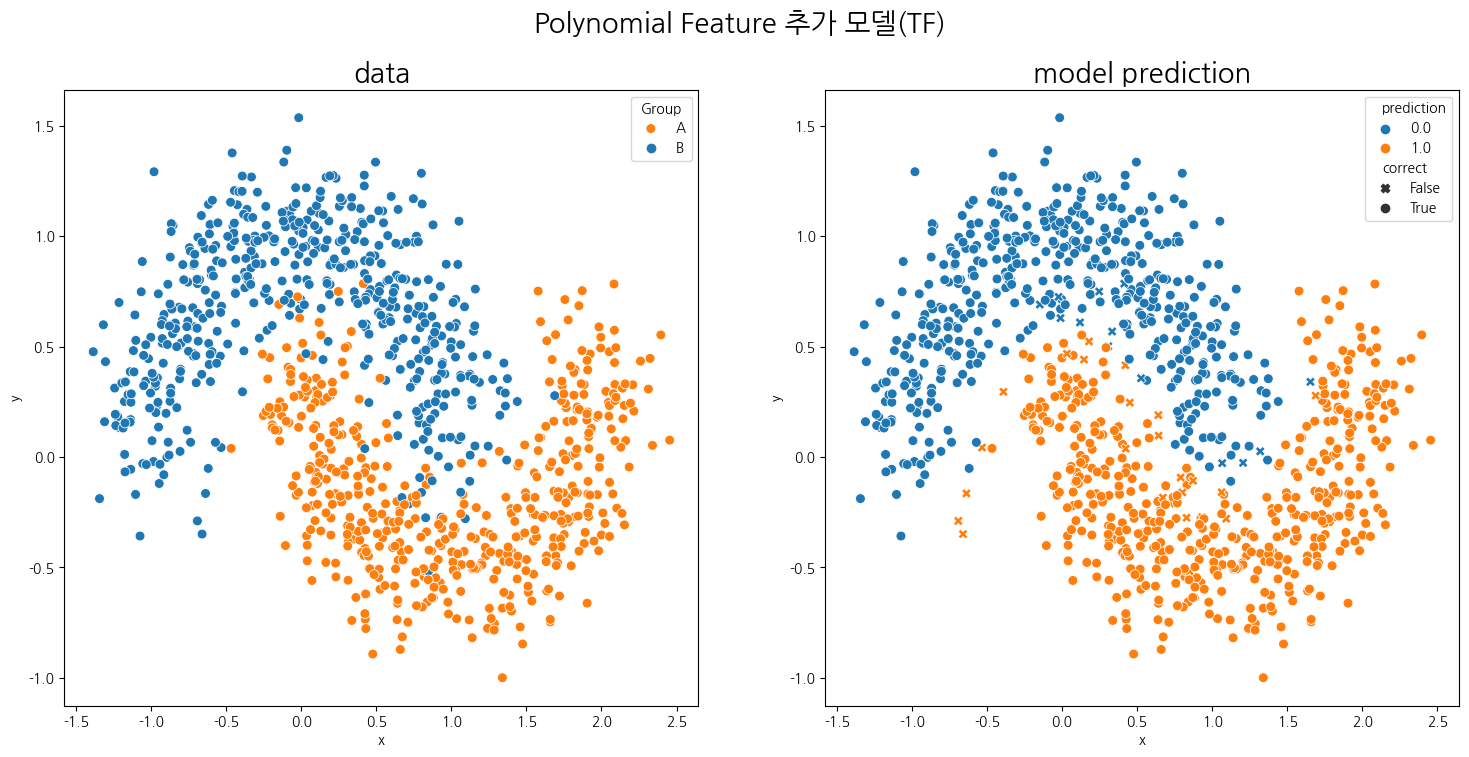

In [ ]:
plot_prediction(X,XX,Y,model_tf, "Polynomial Feature 추가 모델(TF)")

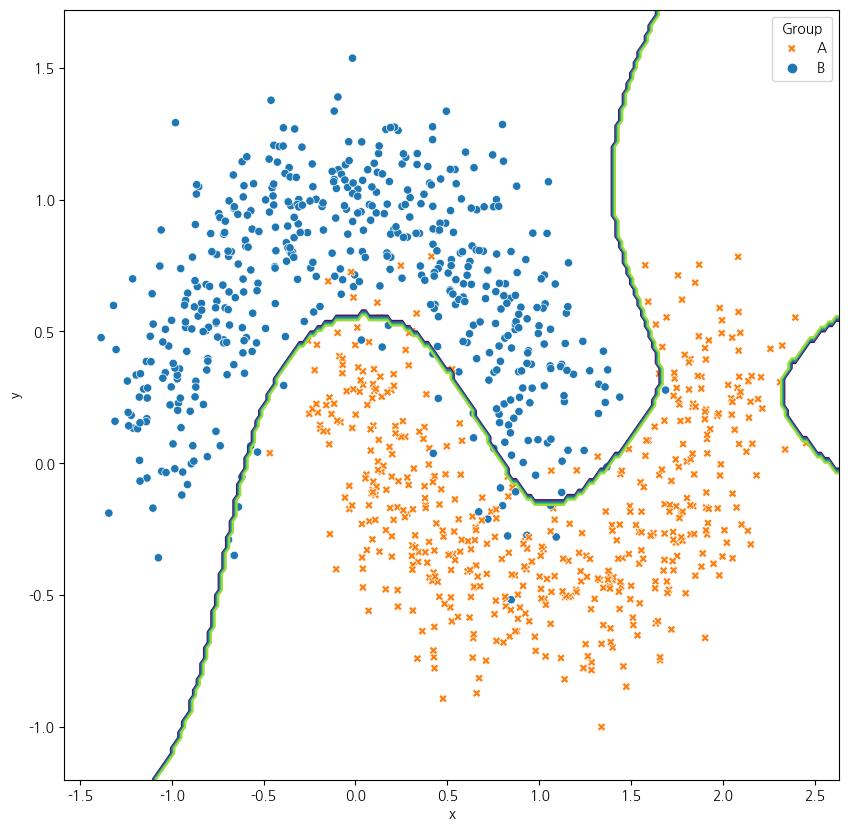

In [ ]:
plot_decision_boundary(X,Y,model_tf,polynomial_degree)

## 3.2.5 Pytorch로 구현

In [ ]:
import torch
import numpy as np

In [ ]:
def torch_reset_seed(seed=100):
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

In [ ]:
seed = 100
np.random.seed(seed)
torch_reset_seed(seed)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

N= 1000
X, Y = generate_data(N, 'moon')  # (N,2), Y(N,)

polynomial_degree = 10
X_ = PolynomialFeatures(degree=polynomial_degree,include_bias=False).fit_transform(X)  # (N,65)

cpu


In [ ]:
learning_rate = 0.1
n_epochs = 50000

XX = torch.Tensor(X_).to(device)  # float32
YY = torch.Tensor(Y).to(device)   # float32
in_features = XX.shape[-1]

logit_flag = True
if logit_flag:
    model_torch = torch.nn.Sequential(torch.nn.Linear(in_features,1))
    loss_fn = torch.nn.BCEWithLogitsLoss()
else:
    model_torch = torch.nn.Sequential(torch.nn.Linear(in_features,1),torch.nn.Sigmoid())
    loss_fn = torch.nn.BCELoss()
model_torch.to(device)

optimizer = torch.optim.SGD(model_torch.parameters(), lr=learning_rate)

In [ ]:
Loss_all = []
model_torch.train() # train mode 변환
for i in range(n_epochs):
    optimizer.zero_grad()
    Y_hat = model_torch(XX)
    Loss = loss_fn(Y_hat.reshape(-1),YY)
    Loss_all.append(Loss.item())
    Loss.backward()
    optimizer.step()
    if i%5000==0:
        print(f'{i}/{n_epochs}: loss = {Loss.item()}')

threshold = 0 if logit_flag else 0.5
Y_pred = np.where(Y_hat > threshold,1,0).reshape(-1)

acc = (Y_pred == Y).mean() # Train Accuracy
print(f'Train Accuracy: {acc}')

0/50000: loss = 2.4493114948272705
5000/50000: loss = 0.10782107710838318
10000/50000: loss = 0.09598082304000854
15000/50000: loss = 0.09101421386003494
20000/50000: loss = 0.09324145317077637
25000/50000: loss = 0.08663959056138992
30000/50000: loss = 0.08484464138746262
35000/50000: loss = 0.08340522646903992
40000/50000: loss = 0.082056924700737
45000/50000: loss = 0.08129101246595383
Train Accuracy: 0.969


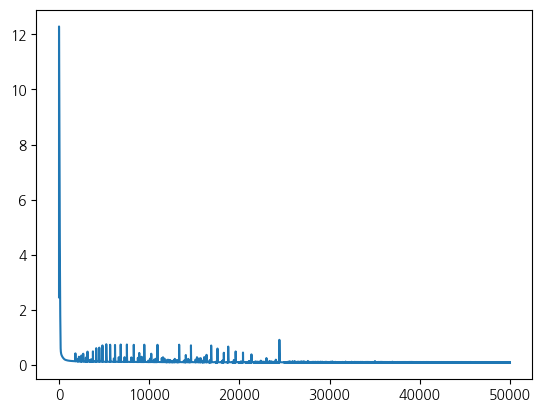

In [ ]:
plt.plot(Loss_all)

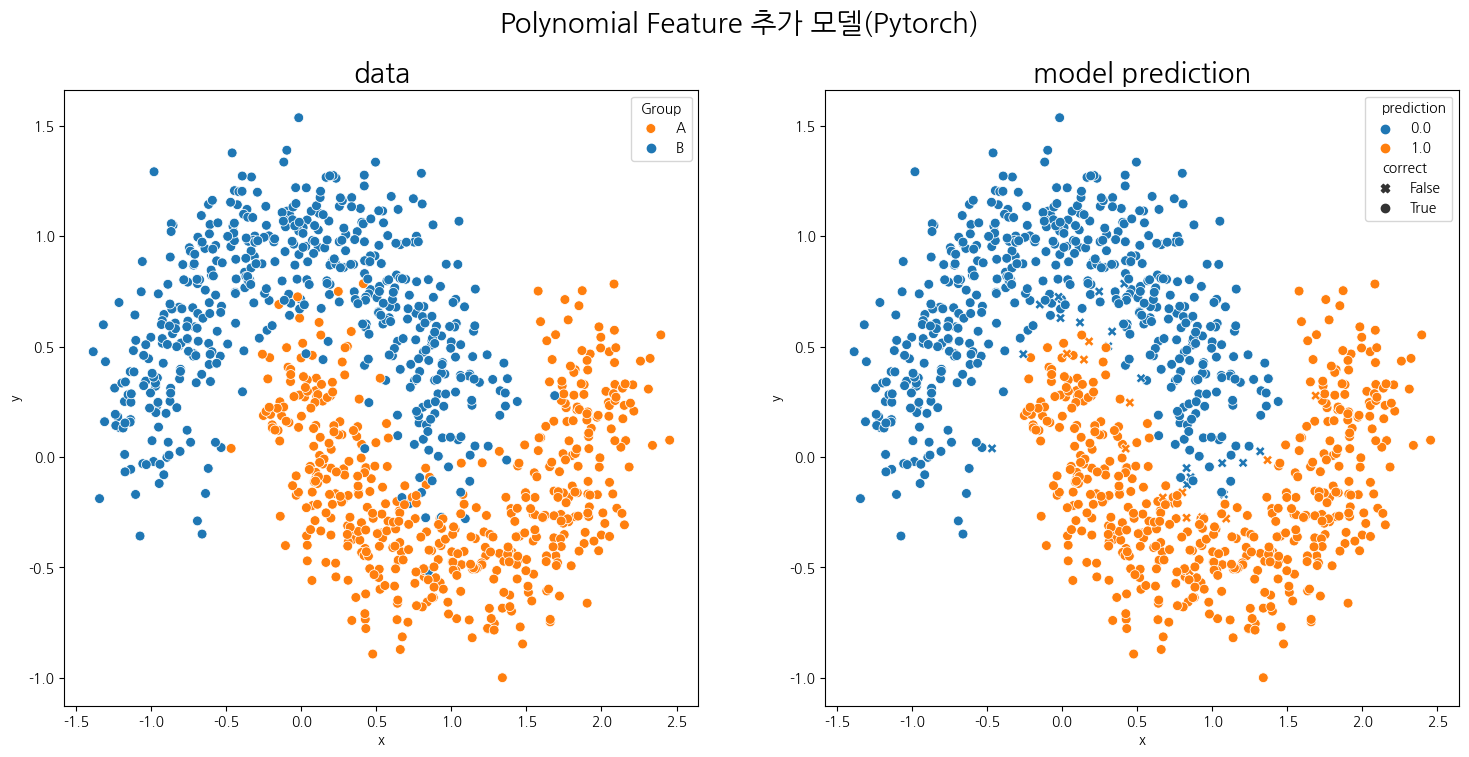

In [ ]:
plot_prediction(X,XX,Y,model_torch, "Polynomial Feature 추가 모델(Pytorch)")

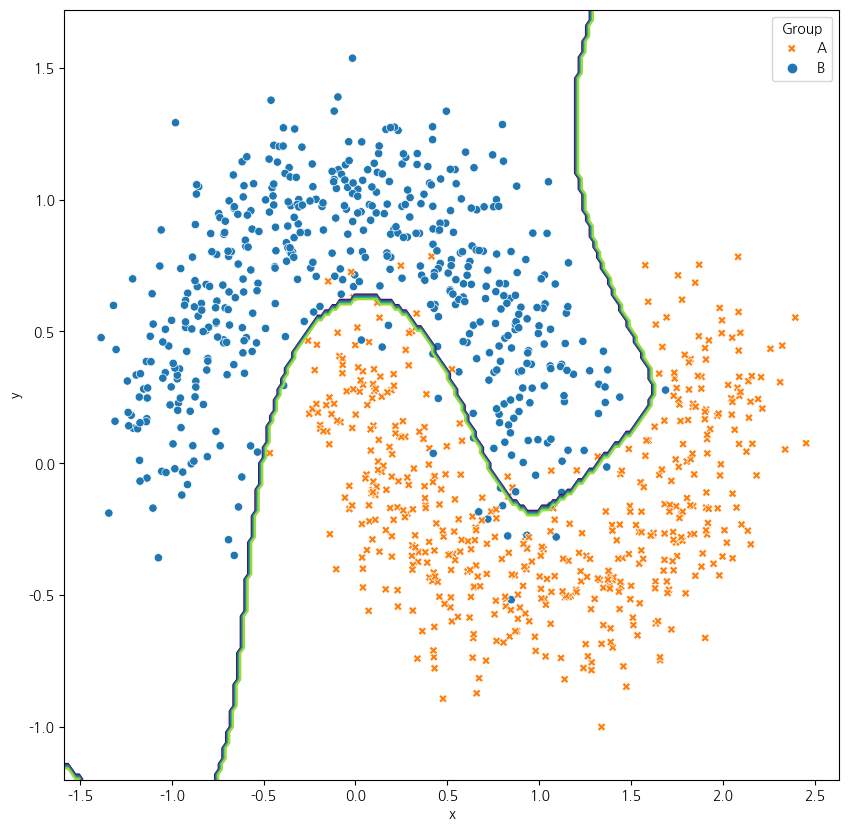

In [ ]:
plot_decision_boundary(X,Y,model_torch,polynomial_degree,torch_model=True,logit_flag=logit_flag,device=device)

# 3.3 딥러닝으로 해결하기

## 3.3.1 왜 비선형 활성 함수가 필요한가?

Text(0.5, 1.0, 'RELU')

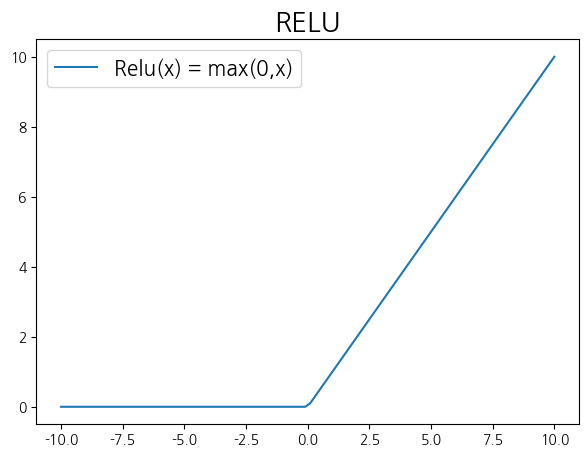

In [ ]:
def relu(x):
    return np.maximum(x,0)

x = np.linspace(-10,10,100)
plt.figure(figsize=(7,5))
plt.plot(x,relu(x),label=r'Relu(x) = max(0,x)')
plt.legend(fontsize="15")
plt.title('RELU',fontsize = 20)

In [ ]:
relu([-1,0,3])

## 3.3.3 Tensorflow 구현

In [ ]:
import numpy as np
import tensorflow as tf

In [ ]:
np.random.seed(100); tf.random.set_seed(100)

N = 1000
X, Y = generate_data(N, 'moon') # (N,2), (N,)

learning_rate = 0.01
n_epochs = 50000

model_tf = tf.keras.Sequential(
    [tf.keras.layers.Dense(10,activation='relu'),
     tf.keras.layers.Dense(10,activation='relu'),
     tf.keras.layers.Dense(10,activation='relu'),
     tf.keras.layers.Dense(10,activation='relu'),
     tf.keras.layers.Dense(1,activation='sigmoid')])
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
model_tf.compile(optimizer,loss='bce',metrics=['accuracy'])

history = model_tf.fit(X,Y,batch_size=N,epochs=n_epochs,verbose=0)

print(f"loss: {history.history['loss'][-1]}, Train Accuracy: {history.history['accuracy'][-1]}")

loss: 0.07184149324893951, Train Accuracy: 0.9710000157356262


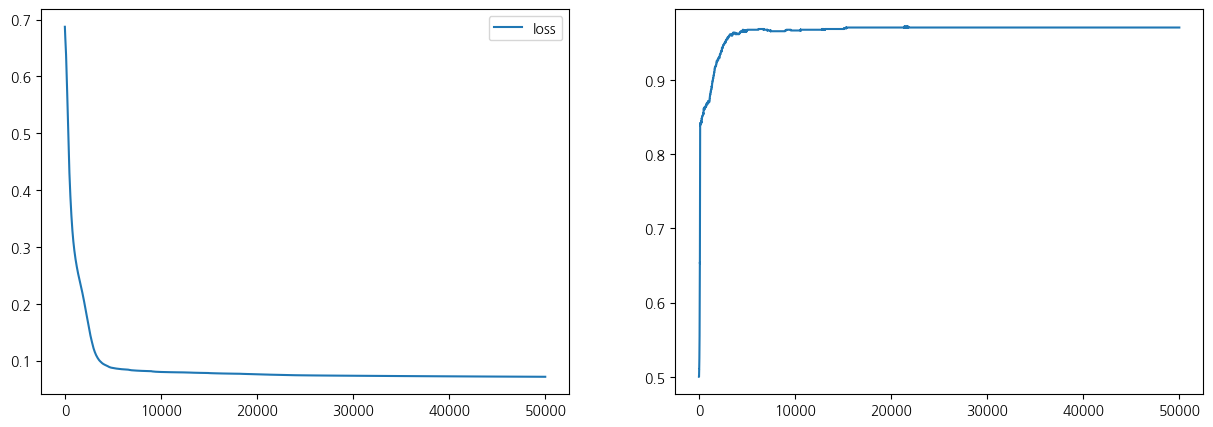

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label='accuracy')

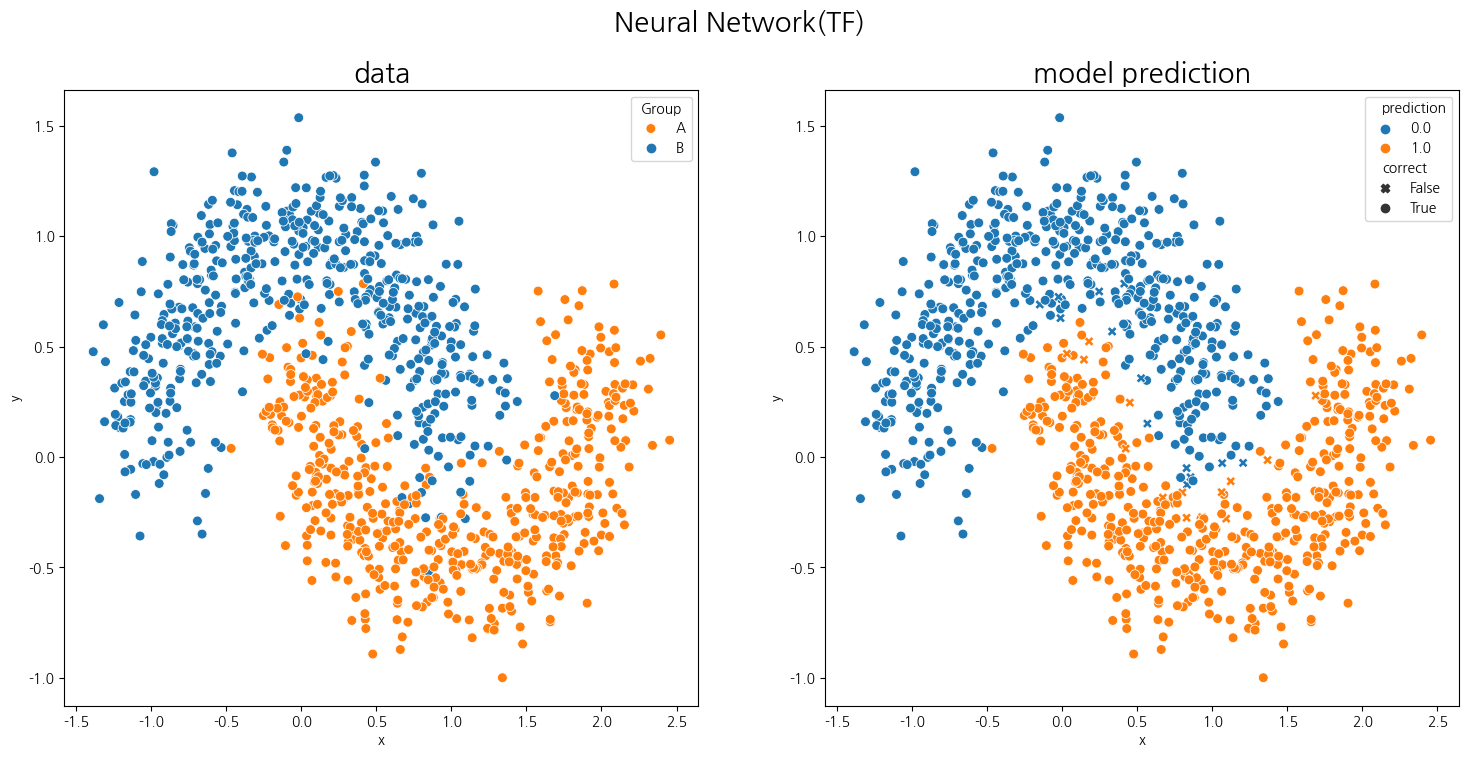

In [ ]:
plot_prediction(X,X,Y,model_tf, "Neural Network(TF)")

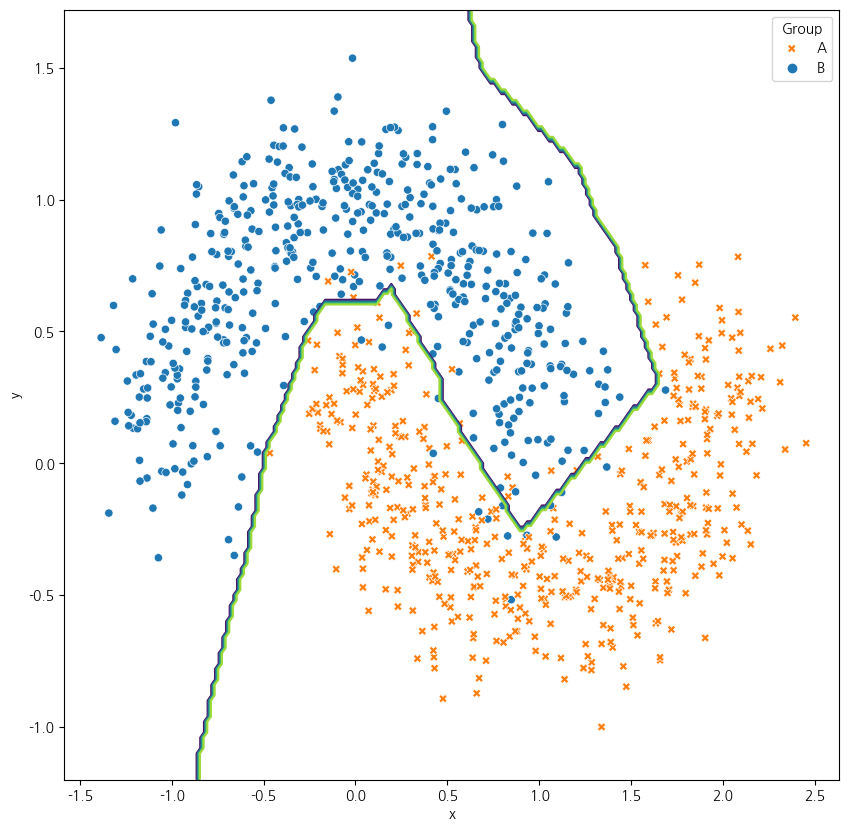

In [ ]:
plot_decision_boundary(X,Y,model_tf)

In [ ]:
model_tf.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 10)                30        
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 371 (1.45 KB)
Trainable params: 371 (1.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 3.3.4 Pytorch 구현

In [ ]:
!pip install torchinfo -qq

In [ ]:
import torch
import numpy as np
from torchinfo import summary

In [ ]:
np.random.seed(100);
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
torch.manual_seed(100)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(100)

model_torch = torch.nn.Sequential(
    torch.nn.Linear(2,10),
    torch.nn.ReLU(),
    torch.nn.Linear(10,10),
    torch.nn.ReLU(),
    torch.nn.Linear(10,10),
    torch.nn.ReLU(),
    torch.nn.Linear(10,10),
    torch.nn.ReLU(),
    torch.nn.Linear(10,1),
    torch.nn.Sigmoid()
)

In [ ]:
N= 1000
X, Y = generate_data(N, 'moon') # (N,2), (N,)

learning_rate = 0.01
n_epochs = 50000

XX = torch.Tensor(X).to(device)
YY = torch.Tensor(Y).reshape(-1,1).to(device)

model_torch.to(device)
loss_fn = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model_torch.parameters(), lr=learning_rate)

Loss_all = []
model_torch.train()  # train mode 변환
for i in range(n_epochs):
    optimizer.zero_grad()
    Y_hat = model_torch(XX)
    Loss = loss_fn(Y_hat,YY)
    Loss_all.append(Loss.item())
    Loss.backward()
    optimizer.step()
    if i%1000==0:
        print(f'{i}/{n_epochs}: loss = {Loss.item()}')

Y_pred = np.where(Y_hat > 0.5,1,0).reshape(-1)
acc = (Y_pred == Y).mean() # Train Accuracy
print(f'Train Accuracy: {acc}')

0/50000: loss = 0.6966015696525574
1000/50000: loss = 0.6880443692207336
2000/50000: loss = 0.6350036263465881
3000/50000: loss = 0.28521454334259033
4000/50000: loss = 0.1836707890033722
5000/50000: loss = 0.10815128684043884
6000/50000: loss = 0.09153565019369125
7000/50000: loss = 0.086428701877594
8000/50000: loss = 0.0845198780298233
9000/50000: loss = 0.08339347690343857
10000/50000: loss = 0.08257072418928146
11000/50000: loss = 0.08164181560277939
12000/50000: loss = 0.08110807090997696
13000/50000: loss = 0.08066463470458984
14000/50000: loss = 0.08018678426742554
15000/50000: loss = 0.07983812689781189
16000/50000: loss = 0.07953308522701263
17000/50000: loss = 0.07925735414028168
18000/50000: loss = 0.07897164672613144
19000/50000: loss = 0.07848598062992096
20000/50000: loss = 0.07816062867641449
21000/50000: loss = 0.07791866362094879
22000/50000: loss = 0.0777144506573677
23000/50000: loss = 0.07755789905786514
24000/50000: loss = 0.07741069048643112
25000/50000: loss = 0

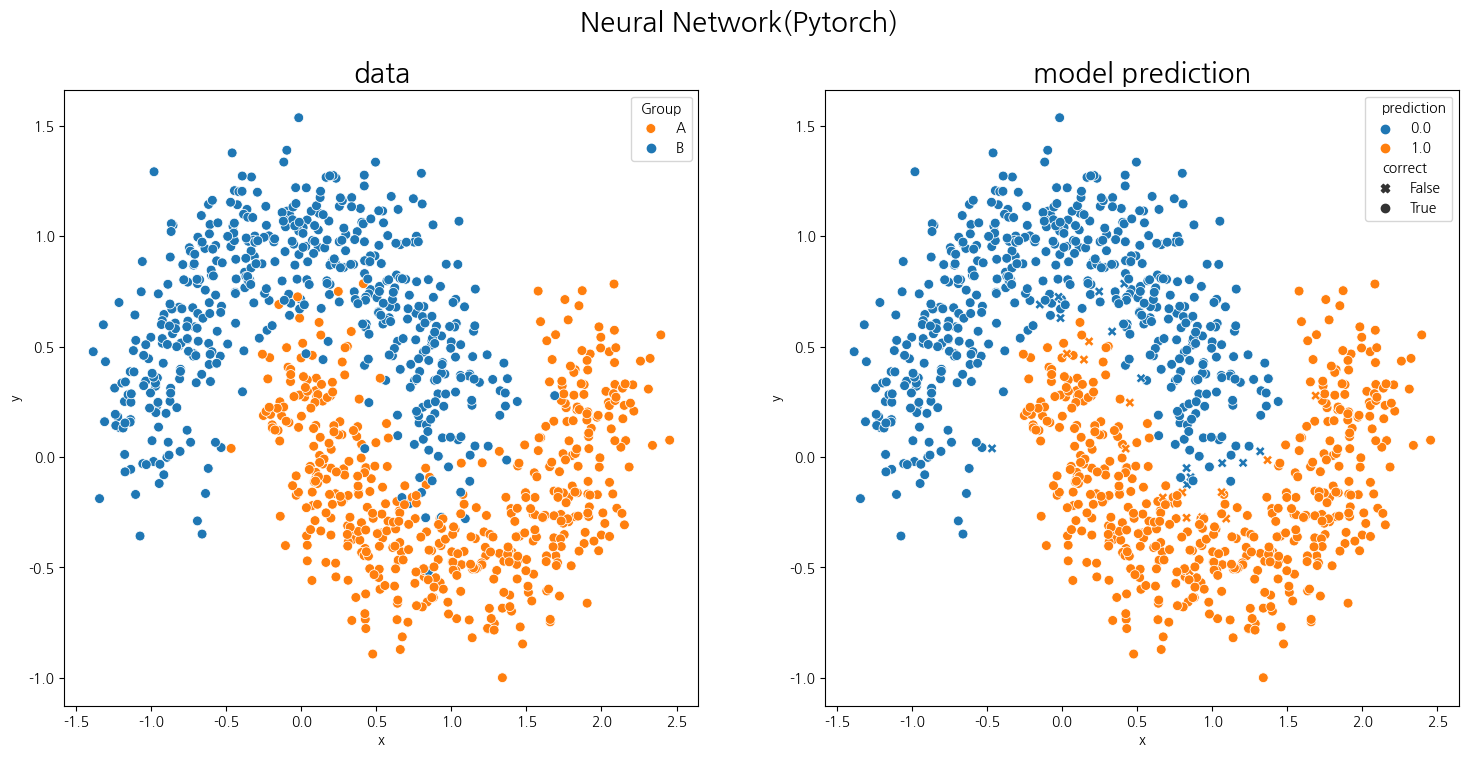

In [ ]:
plot_prediction(X,XX,Y,model_torch, "Neural Network(Pytorch)")

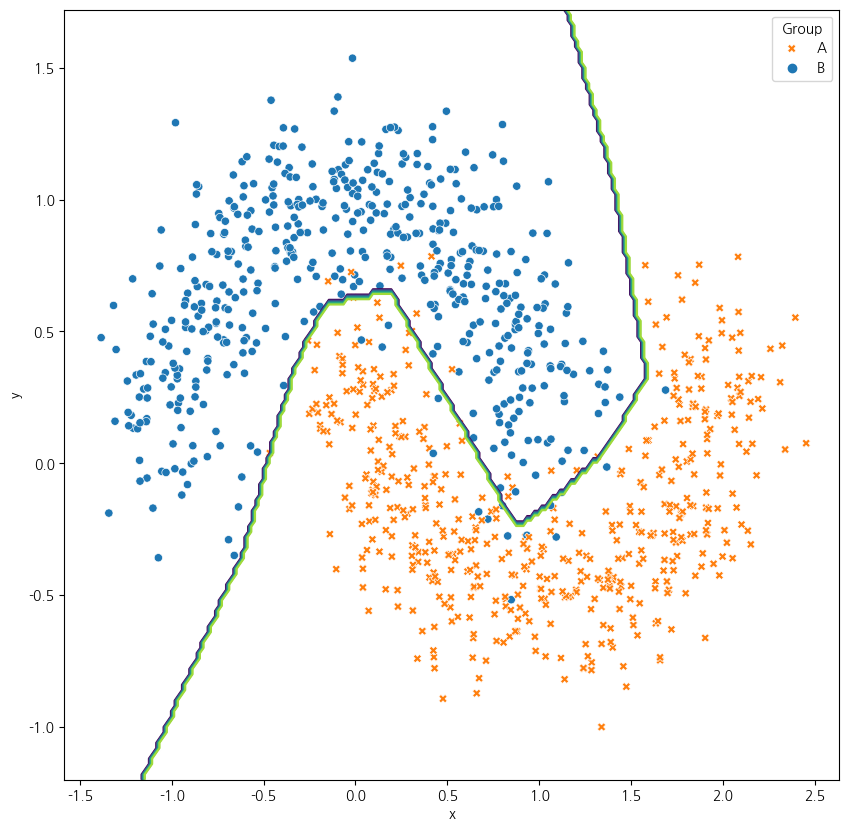

In [ ]:
plot_decision_boundary(X,Y,model_torch,torch_model=True,device=device)

In [ ]:
summary(model_torch)

Layer (type:depth-idx)                   Param #
Sequential                               --
├─Linear: 1-1                            30
├─ReLU: 1-2                              --
├─Linear: 1-3                            110
├─ReLU: 1-4                              --
├─Linear: 1-5                            110
├─ReLU: 1-6                              --
├─Linear: 1-7                            110
├─ReLU: 1-8                              --
├─Linear: 1-9                            11
├─Sigmoid: 1-10                          --
Total params: 371
Trainable params: 371
Non-trainable params: 0

# 3.4 2-Layer 모델의 역전파

## 3.4.1 A Neural Network in 11 lines
- https://iamtrask.github.io/2015/07/12/basic-python-network/

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
X = np.array([ [0,0,1],[0,1,1],[1,0,1],[1,1,1] ])
Y = np.array([[0,1,1,0]]).T
W1 = 2*np.random.random((3,4)) - 1
W2 = 2*np.random.random((4,1)) - 1
for j in range(60000):
    Z = 1/(1+np.exp(-(np.dot(X,W1))))
    Y_hat = 1/(1+np.exp(-(np.dot(Z,W2))))
    dX2 = (Y - Y_hat)*(Y_hat*(1-Y_hat))
    dZ = dX2.dot(W2.T) * (Z * (1-Z))
    W2 += Z.T.dot(dX2)
    W1 += X.T.dot(dZ)

In [ ]:
np.where(Y_hat>0.5,1,0)

array([[0],
       [1],
       [1],
       [0]])

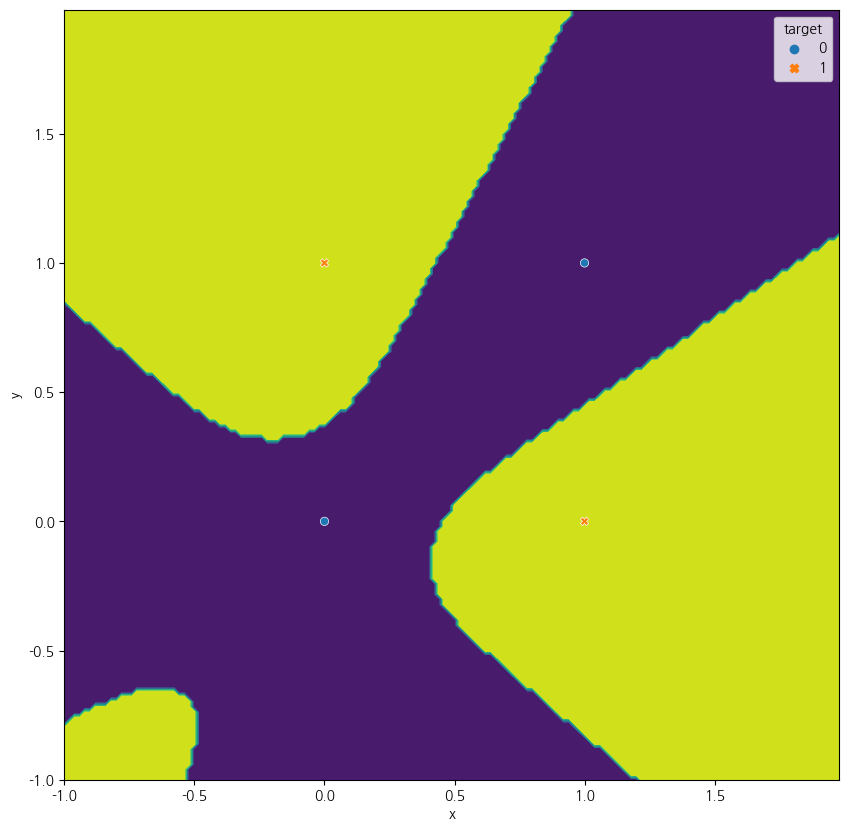

In [ ]:
# 입력 데이터의 값 범위
x_min, x_max = -1, 2
y_min, y_max = -1, 2
h = 0.02
# Grid 생성
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# 생성된 Grid 값을 모델에 넣기 위해 Feature 추가

grid_data = np.c_[xx.ravel(), yy.ravel()]
grid_data = np.c_[grid_data,np.ones(grid_data.shape[0])]  # 1로된 column 추가
z = 1/(1+np.exp(-(np.dot(grid_data,W1))))
y_hat= 1/(1+np.exp(-(np.dot(z,W2))))

Z = np.where(y_hat > 0.5,1,0)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 10))
plt.contourf(xx, yy, Z)

df = pd.DataFrame(data=np.c_[X[:,:2],Y],columns=['x','y','target'])
ax = sns.scatterplot(x='x',y='y',hue='target',style='target',data=df)

BCE Loss 사용

In [ ]:
X = np.array([ [0,0,1],[0,1,1],[1,0,1],[1,1,1] ])
Y = np.array([[0,1,1,0]]).T
W1 = 2*np.random.random((3,4)) - 1
W2 = 2*np.random.random((4,1)) - 1
for j in range(60000):
    Z = 1/(1+np.exp(-(np.dot(X,W1))))
    Y_hat = 1/(1+np.exp(-(np.dot(Z,W2))))
    #dX2 = (Y - Y_hat)*(Y_hat*(1-Y_hat))
    dX2 = (Y - Y_hat)
    dZ = dX2.dot(W2.T) * (Z * (1-Z))
    W2 += Z.T.dot(dX2)
    W1 += X.T.dot(dZ)

In [ ]:
np.where(Y_hat>0.5,1,0)

array([[0],
       [1],
       [1],
       [0]])

## 3.5.1 Relu 역전파

In [ ]:
import numpy as np

In [ ]:
def relu(x):
    return np.maximum(x,0)

n = 10
X = np.random.randn(n)
Y = relu(X)

dY = np.random.randn(n)  # upstream gradient dY~는 이미 계산되었다고 가정.~

dX = dY.copy()
dX[X<0] = 0

## 3.5.3 행렬곱 미분 예
- sin 곡선 fitting

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [ ]:
# Create random input and output data
n = 2000; n_epoch = 2000
x = np.linspace(-math.pi, math.pi, n)
y = np.sin(x)

# Randomly initialize weights
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

learning_rate = 1e-6
for t in range(n_epoch):
    # Forward pass: compute predicted y
    # y = a + b x + c x^2 + d x^3
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')

99 1064.6319289121705
199 708.2730179052668
299 472.25303309849164
399 315.9156426367094
499 212.3470658151283
599 143.72755610301945
699 98.25752433345068
799 68.1229707469358
899 48.148735111433254
999 34.90697348878849
1099 26.12694157905476
1199 20.30422080260638
1299 16.441970078925742
1399 13.879581626359135
1499 12.179204868723122
1599 11.050586716591798
1699 10.301284703268077
1799 9.803683503024983
1899 9.473140788535414
1999 9.253505173849733
Result: y = -0.0066338309290033225 + 0.837370674334854 x + 0.001144446222676209 x^2 + -0.09057515121439942 x^3


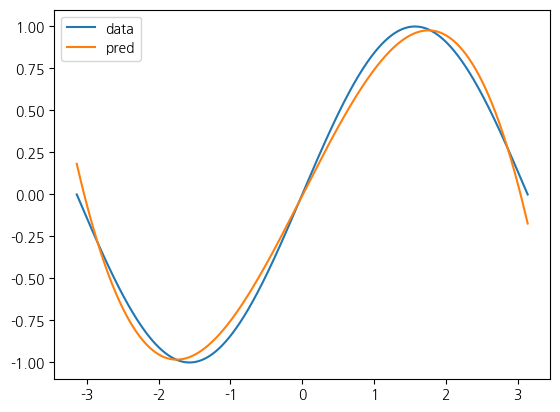

In [ ]:
plt.plot(x,y,label='data')
plt.plot(x,y_pred,label='pred')
plt.legend()

## 3.5.4 2-Layer Model From Scratch

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

50 11870.078510909301
100 303.53572725937306
150 12.546166609724175
200 0.6322667927677779
250 0.03534420305731056
300 0.0021084509133418093
350 0.00013180842143498676
400 8.545868586539867e-06
450 5.707558764995002e-07
500 3.9067670493277786e-08


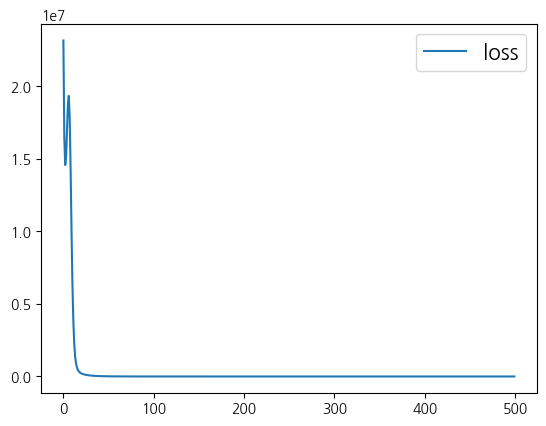

In [ ]:
N, Di, H, Do = 64, 1000, 100, 10

# 무작위의 입력과 출력 데이터를 생성
X = np.random.randn(N, Di)
Y = np.random.randn(N, Do)

# 무작위로 가중치를 초기화
W1 = np.random.randn(Di, H)
W2 = np.random.randn(H, Do)

learning_rate = 1e-6
loss_all = []
for t in range(500):
    # 순전파: 예측값 y를 계산
    Z = X.dot(W1)   # (N,H)
    Z_relu = np.maximum(Z, 0)
    Y_pred = Z_relu.dot(W2) #(N,Do)

    # 손실(loss)를 계산하고 출력
    loss = np.square(Y_pred - Y).sum()
    loss_all.append(loss)
    if (t+1)% 50 == 0:
        print(t+1, loss)

    # 손실에 따른 W1, W2의 gradient를 계산
    grad_Y_pred = 2.0 * (Y_pred - Y)  # shape(N,Do)
    grad_W2 = Z_relu.T.dot(grad_Y_pred) # shape(H,Do) = W2 shape
    grad_Z_relu = grad_Y_pred.dot(W2.T)
    grad_Z = grad_Z_relu.copy()
    grad_Z[Z < 0] = 0
    grad_W1 = X.T.dot(grad_Z)  # shape(Di,H) = W1 shape

    # W1, W2 업데이트
    W1 -= learning_rate * grad_W1
    W2 -= learning_rate * grad_W2

plt.plot(loss_all, label='loss')
plt.legend(fontsize=15)

# 3.6 Layer Weight 초기화

## 3.6.1 Tensorflow 가중치 초기화

In [ ]:
from tensorflow.keras.initializers import Constant, GlorotNormal

init = np.array([[2,1,5],[0.1,2,-1]]) # init: shape(2,3) --> 입력차원=2, 출력차원=3
L = tf.keras.layers.Dense(3, kernel_initializer=Constant(init))

L2 = tf.keras.layers.Dense(5,kernel_initializer=GlorotNormal())

In [ ]:
L.build((None,2))  #  (batch_size,입력차원)
L.weights

[<tf.Variable 'kernel:0' shape=(2, 3) dtype=float32, numpy=
 array([[ 2. ,  1. ,  5. ],
        [ 0.1,  2. , -1. ]], dtype=float32)>,
 <tf.Variable 'bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>]

## 3.6.2 Pytorch 가중치 초기화

In [ ]:
import torch
import torch.nn as nn
import numpy as np

In [ ]:
def weights_init(m):
    if type(m) == nn.Linear:
        torch.nn.init.xavier_normal_(m.weight)
        torch.nn.init.zeros_(m.bias)  # m.bias.data.fill_(0.)
    elif isinstance(m, nn.Conv2d):
        torch.nn.init.xavier_uniform_(m.weight)
        torch.nn.init.zeros_(m.bias)

In [ ]:
net = torch.nn.Sequential(nn.Linear(2,3),nn.ReLU(),nn.Linear(3,2))

In [ ]:
net[0].bias  # default initialization인 He Uniform

Parameter containing:
tensor([-0.6328, -0.4267,  0.4362], requires_grad=True)

In [ ]:
net.apply(weights_init)

Sequential(
  (0): Linear(in_features=2, out_features=3, bias=True)
  (1): ReLU()
  (2): Linear(in_features=3, out_features=2, bias=True)
)

In [ ]:
# bias가 0으로 초기화된 것을 확인할 수 있다.
net[0].bias, net[0].weight

(Parameter containing:
 tensor([0., 0., 0.], requires_grad=True),
 Parameter containing:
 tensor([[ 0.0398, -0.7058],
         [-0.0530,  0.2373],
         [ 0.3649, -0.3961]], requires_grad=True))

직접 접근하여 초기화할 수도 있다.

In [ ]:
net[0].weight.data.normal_(0,1)

tensor([[ 1.0359, -0.3128],
        [ 0.6511,  0.8339],
        [ 0.0520,  1.5886]])

In [ ]:
net[0].bias.data.fill_(0.1)  # 모두 같은 값으로 채운다.

tensor([0.1000, 0.1000, 0.1000])

In [ ]:
# 이렇게 할 수도 있다.
net[0].bias.data = torch.Tensor(np.array([1.2,2.2,3.3]))

In [ ]:
net[0].bias, net[0].weight

(Parameter containing:
 tensor([1.2000, 2.2000, 3.3000], requires_grad=True),
 Parameter containing:
 tensor([[ 1.0359, -0.3128],
         [ 0.6511,  0.8339],
         [ 0.0520,  1.5886]], requires_grad=True))

# 3.7 Overfitting 방지 기법들

## 3.7.1 Regularization

### Weight Regularization - TF
- L2-norm의 제곱 또는 L1-norm

In [ ]:
import tensorflow as tf
import numpy as np
import torch

In [ ]:
def create_layer():
    model = tf.keras.Sequential(
		   [tf.keras.layers.Dense(3, activation="relu",kernel_regularizer=tf.keras.regularizers.l2(0.001)),
		    tf.keras.layers.Dense(1, activation="relu",kernel_regularizer=tf.keras.regularizers.l2(0.001))])
    model.build((None,2))
    return model

L = create_layer()
print(L.losses) # 각각의 가중치가 곱해진 regularization loss

[<tf.Tensor: shape=(), dtype=float32, numpy=0.0042570285>, <tf.Tensor: shape=(), dtype=float32, numpy=0.0016287246>]


In [ ]:
np.square(L.weights[2].numpy()).sum()*0.001

0.0013604280948638916

In [ ]:
np.abs(L.weights[2].numpy()).sum()*0.001

0.0016287245750427246

### Weight Regularization - Pytorch
- 0.5 * (L2-norm의 제곱)

In [ ]:
np.set_printoptions(8, suppress=True)

x_numpy = np.random.random((3, 4))
w_numpy = np.random.random((4, 5))
x_torch = torch.tensor(x_numpy, requires_grad=True)
w_torch = torch.tensor(w_numpy, requires_grad=True)

lr = 0.1; weight_decay=0.05
sgd = torch.optim.SGD([w_torch], lr=lr, weight_decay=weight_decay)

y_torch = torch.matmul(x_torch, w_torch)
loss = y_torch.sum()

print("w_torch before SGD")
print(w_torch.data.numpy())

sgd.zero_grad()
loss.backward() # regularization 부분의 미분이 포함된다.
sgd.step()

w_grad = w_torch.grad.data.numpy()

print("w_torch after SGD(autograd)")
print(w_torch.data.numpy())

print("check_weight_decay(manual)")
print(w_numpy - lr * (w_grad + weight_decay*w_numpy))  # 0.5*(L2-norm의 제곱)임을 알 수 있다.

w_torch before SGD
[[0.75424483 0.59450645 0.78119604 0.73173565 0.34942815]
 [0.43014985 0.88071892 0.23489959 0.38165948 0.16213327]
 [0.09707726 0.59904843 0.55709891 0.55363228 0.53001513]
 [0.0659067  0.14399381 0.57931118 0.63039523 0.42743068]]
w_torch after SGD(autograd)
[[ 0.71397583  0.55503614  0.74079228  0.6915792   0.31118323]
 [ 0.21222332  0.66053955  0.01794931  0.1639754  -0.05445317]
 [-0.08821122  0.41125009  0.36951032  0.36606102  0.34256196]
 [-0.13329016 -0.05559349  0.3775473   0.42837592  0.2264262 ]]
check_weight_decay(manual)
[[ 0.71397583  0.55503614  0.74079228  0.6915792   0.31118323]
 [ 0.21222332  0.66053955  0.01794931  0.1639754  -0.05445317]
 [-0.08821122  0.41125009  0.36951032  0.36606102  0.34256196]
 [-0.13329016 -0.05559349  0.3775473   0.42837592  0.2264262 ]]


Regularization(직접 계산)

In [ ]:
model_torch = torch.nn.Sequential(
    torch.nn.Linear(2,3),
    torch.nn.ReLU(),
    torch.nn.Linear(3,2),
    torch.nn.ReLU()
)

In [ ]:
reg_loss = 0
for name, param in model_torch.named_parameters():
    if 'weight' in name:
        reg_loss += 0.5*torch.norm(param,2).square() # L2 norm square

print(reg_loss)

tensor(0.7876, grad_fn=<AddBackward0>)


## 3.7.2 Dropout

Pytorch - Dropout Layer 직접 구현

In [ ]:
import torch
import numpy as np

In [ ]:
class Dropout(torch.nn.Module):
    def __init__(self, drop_rate=0.5):
        super(Dropout, self).__init__()
        self.drop_rate = np.clip(drop_rate,0.,0.99999)

    def forward(self, x):
        if self.training:
            x = x.mul(torch.rand(*x.shape) >= self.drop_rate) / (1 - self.drop_rate)
        return x

L = Dropout(0.5)
xx = torch.randn(4,5)

L.train() # L.training=True
yy = L(xx)

L.eval() # L.training=False
zz = L(xx)

## 3.7.4 Gradient Clipping

In [ ]:
import torch

In [ ]:
model_torch = torch.nn.Sequential(
    torch.nn.Linear(2,3),
    torch.nn.ReLU(),
    torch.nn.Linear(3,1),
)
model = model_torch
loss_fn = torch.nn.MSELoss()

In [ ]:
x = torch.randn(4,2)
target = torch.rand(4,1)


pred = model(x)
loss = loss_fn(pred,target)
loss.backward()

In [ ]:
norm_sum = 0
for w in model.parameters():
    norm = w.grad.square().sum()
    norm_sum += norm

    norm = torch.norm(w.grad,2)
    print(w.grad, "norm = ",norm)
    print('='*10)

print(norm_sum.sqrt())

tensor([[ 0.0044,  0.0524],
        [ 0.0878, -0.0704],
        [ 0.1959, -0.1216]]) norm =  tensor(0.2619)
tensor([0.1232, 0.0565, 0.1214]) norm =  tensor(0.1820)
tensor([[-0.0262, -0.5298, -0.6630]]) norm =  tensor(0.8491)
tensor([-0.6903]) norm =  tensor(0.6903)
tensor(1.1398)


In [ ]:
torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=0.5, norm_type=2)

tensor(1.1398)

In [ ]:
norm_sum = 0
for w in model.parameters():
    norm = w.grad.square().sum()
    norm_sum += norm

    norm = torch.norm(w.grad,2)
    print(w.grad, "norm = ",norm)
    print('='*10)

print(norm_sum.sqrt())

tensor([[ 0.0019,  0.0230],
        [ 0.0385, -0.0309],
        [ 0.0859, -0.0533]]) norm =  tensor(0.1149)
tensor([0.0540, 0.0248, 0.0533]) norm =  tensor(0.0798)
tensor([[-0.0115, -0.2324, -0.2908]]) norm =  tensor(0.3725)
tensor([-0.3028]) norm =  tensor(0.3028)
tensor(0.5000)


# 3.8 Activation Function

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def relu(x):
    return np.maximum(0,x)
def elu(x,a=1):
    return (x>0)*x + (x<=0)*(a*(np.exp(x)-1))
def gelu(x):
    return 0.5 * x * (1 + np.tanh(x * 0.7978845608 * (1 + 0.044715 * x * x)))
def softplus(x):
    return np.log(1+np.exp(x))
def softsign(x):
    return x/(1+np.abs(x))
def swish(x):
    return x/(1+np.exp(-x))
def selu(x):
    lambda_ = 1.05070098; a = 1.67326324
    return lambda_*((x>0)*x + (x<=0)*(a*(np.exp(x)-1)))


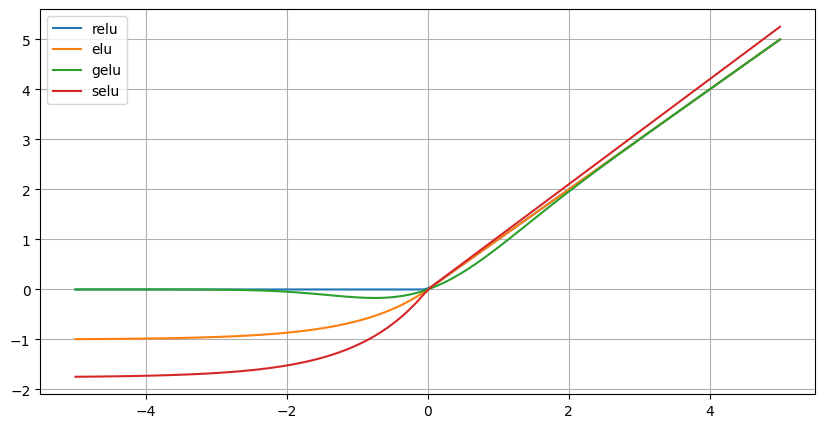

In [ ]:
x = np.linspace(-5,5,100)
plt.figure(figsize=(10,5))
plt.plot(x,relu(x))
plt.plot(x,elu(x))
plt.plot(x,gelu(x))
plt.plot(x,selu(x))
plt.legend(['relu','elu','gelu','selu'])
plt.grid(True)

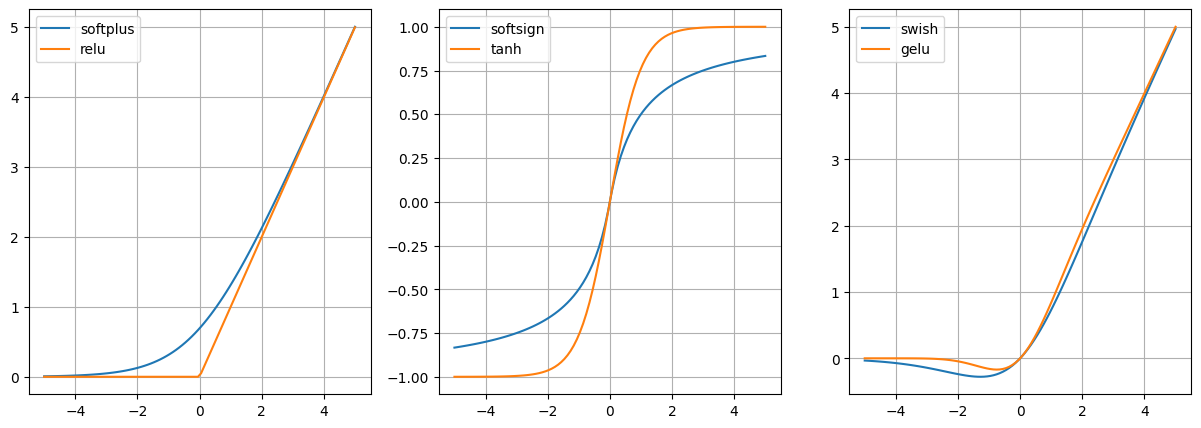

In [ ]:
x = np.linspace(-5,5,100)
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(x,softplus(x))
plt.plot(x,relu(x))
plt.legend(['softplus','relu'])
plt.grid(True)

plt.subplot(1,3,2)
plt.plot(x,softsign(x))
plt.plot(x,np.tanh(x))
plt.legend(['softsign','tanh'])
plt.grid(True)

plt.subplot(1,3,3)
plt.plot(x,swish(x))
plt.plot(x,gelu(x))
plt.legend(['swish','gelu'])

plt.grid(True)